In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Synthetic_Retail_Sales__Canada__100k_.csv to Synthetic_Retail_Sales__Canada__100k_ (1).csv


In [ ]:
import pandas as pd

df= pd.read_csv('Synthetic_Retail_Sales__Canada__100k_.csv')

In [ ]:
import sys, re, difflib, textwrap
import numpy as np
import pandas as pd

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 120)


In [ ]:
def df_overview(df: pd.DataFrame, name="df"):
    print(f"📦 {name} shape:", df.shape)
    print("\n🧱 Columns:")
    for c in df.columns:
        print(" -", c)
    print("\n🔠 Dtypes:\n", df.dtypes)
    print("\n🔎 Head:")
    display(df.head(3))

# Example: if your dataframe variable is df
df_overview(df, "retail df")


📦 retail df shape: (100000, 15)

🧱 Columns:
 - TransactionID
 - Date
 - Year
 - Month
 - DayOfWeek
 - IsWeekend
 - Province
 - CustomerType
 - MembershipStatus
 - ProductCategory
 - UnitsSold
 - UnitPrice
 - Revenue
 - PromotionApplied
 - Returned

🔠 Dtypes:
 TransactionID        object
Date                 object
Year                  int64
Month                 int64
DayOfWeek            object
IsWeekend              bool
Province             object
CustomerType         object
MembershipStatus     object
ProductCategory      object
UnitsSold             int64
UnitPrice           float64
Revenue             float64
PromotionApplied     object
Returned             object
dtype: object

🔎 Head:


,TransactionID,Date,Year,Month,DayOfWeek,IsWeekend,Province,CustomerType,MembershipStatus,ProductCategory,UnitsSold,UnitPrice,Revenue,PromotionApplied,Returned
0,c61c1fd3-bf64-4a7c-adcb-370a225d6e87,2024-12-02,2024,12,Monday,False,ON,Regular,No,Electronics,1,596.56,623.85,Yes,No
1,edbc400b-d946-4da8-8630-8f7e361ac265,2019-02-26,2019,2,Tuesday,False,PE,Regular,No,Furniture,2,590.73,1117.06,No,No
2,ad1c8a3c-4574-4b26-9b41-4bb6954954e0,2018-12-25,2018,12,Tuesday,False,ON,First-time,No,Electronics,2,1995.98,3197.06,No,No


In [ ]:
# Define the columns you expect in this project (adjust as needed)
EXPECTED = {
    "OrderDate": ["order_date","date","invoice_date","Order Date"],
    "Month": ["month","mnth","MonthName"],
    "Year": ["year","yr"],
    "ProductCategory": ["product_category","category","prod_category"],
    "SubCategory": ["sub_category","subcategory","product_sub_category"],
    "Quantity": ["qty","quantity_sold","Units","unit_sold"],
    "UnitPrice": ["price","unit_price","selling_price"],
    "Revenue": ["revenue","sales","sales_amount","total_revenue","Amount"],
    "Cost": ["cost","cogs","cost_of_goods_sold"],
    "Profit": ["profit","margin","gross_profit"],
    "StoreType": ["store_type","Store Type","store_format"],
    "StoreID": ["store_id","location_id","shop_id"],
    "City": ["city","customer_city"],
    "Province": ["province","state","customer_province"],
    "CustomerType": ["customer_type","cust_type","segment"],
    "MembershipStatus": ["membership_status","loyalty_tier","membership"],
    "SalesChannel": ["channel","channel_of_sale","sales_channel","Channel"],
}

def guess_columns(df: pd.DataFrame, expected_map: dict, cutoff=0.7):
    suggestions = {}
    df_cols = list(df.columns)
    for canon, alts in expected_map.items():
        # Try exact first
        for c in [canon] + alts:
            if c in df_cols:
                suggestions[canon] = c
                break
        if canon not in suggestions:
            # fuzzy match
            match = difflib.get_close_matches(canon, df_cols, n=1, cutoff=cutoff)
            if match:
                suggestions[canon] = match[0]
            else:
                # try fuzzy vs alternatives list
                m2 = difflib.get_close_matches(" ".join(alts), df_cols, n=1, cutoff=cutoff)
                if m2:
                    suggestions[canon] = m2[0]
    return suggestions

guessed = guess_columns(df, EXPECTED)
print("🧭 Column mapping suggestions (canonical → current):")
for k,v in guessed.items():
    print(f" - {k:18} → {v}")

missing = [k for k in EXPECTED.keys() if k not in guessed]
if missing:
    print("\n⚠️ Not found (check your dataset or adjust EXPECTED):", missing)


🧭 Column mapping suggestions (canonical → current):
 - Month              → Month
 - Year               → Year
 - ProductCategory    → ProductCategory
 - UnitPrice          → UnitPrice
 - Revenue            → Revenue
 - Province           → Province
 - CustomerType       → CustomerType
 - MembershipStatus   → MembershipStatus

⚠️ Not found (check your dataset or adjust EXPECTED): ['OrderDate', 'SubCategory', 'Quantity', 'Cost', 'Profit', 'StoreType', 'StoreID', 'City', 'SalesChannel']


In [ ]:
# Build rename dict only when canonical ≠ current
rename_map = {canon: cur for canon,cur in guessed.items() if canon != cur}
print("📝 Will rename these columns:\n", rename_map)

# Preview effect
df_preview = df.rename(columns={v:k for k,v in rename_map.items()})
df_overview(df_preview, "PREVIEW after rename")

# If looks good, apply for real:
df = df.rename(columns={v:k for k,v in rename_map.items()})


📝 Will rename these columns:
 {}
📦 PREVIEW after rename shape: (100000, 15)

🧱 Columns:
 - TransactionID
 - Date
 - Year
 - Month
 - DayOfWeek
 - IsWeekend
 - Province
 - CustomerType
 - MembershipStatus
 - ProductCategory
 - UnitsSold
 - UnitPrice
 - Revenue
 - PromotionApplied
 - Returned

🔠 Dtypes:
 TransactionID        object
Date                 object
Year                  int64
Month                 int64
DayOfWeek            object
IsWeekend              bool
Province             object
CustomerType         object
MembershipStatus     object
ProductCategory      object
UnitsSold             int64
UnitPrice           float64
Revenue             float64
PromotionApplied     object
Returned             object
dtype: object

🔎 Head:


,TransactionID,Date,Year,Month,DayOfWeek,IsWeekend,Province,CustomerType,MembershipStatus,ProductCategory,UnitsSold,UnitPrice,Revenue,PromotionApplied,Returned
0,c61c1fd3-bf64-4a7c-adcb-370a225d6e87,2024-12-02,2024,12,Monday,False,ON,Regular,No,Electronics,1,596.56,623.85,Yes,No
1,edbc400b-d946-4da8-8630-8f7e361ac265,2019-02-26,2019,2,Tuesday,False,PE,Regular,No,Furniture,2,590.73,1117.06,No,No
2,ad1c8a3c-4574-4b26-9b41-4bb6954954e0,2018-12-25,2018,12,Tuesday,False,ON,First-time,No,Electronics,2,1995.98,3197.06,No,No


In [ ]:
# Parse OrderDate if it exists
if "OrderDate" in df.columns:
    df["OrderDate"] = pd.to_datetime(df["OrderDate"], errors="coerce", infer_datetime_format=True)
    # Derived
    df["Year"]  = df["OrderDate"].dt.year
    df["Month"] = df["OrderDate"].dt.month
    df["MonthName"] = df["OrderDate"].dt.month_name()
    print("✅ Parsed OrderDate and created Year, Month, MonthName.")
else:
    print("⛔ 'OrderDate' not present after rename—skip time derivations.")


⛔ 'OrderDate' not present after rename—skip time derivations.


In [ ]:
def mixed_type_columns(df):
    # crude check: object columns that look numeric sometimes
    candidates = []
    for c in df.select_dtypes(include=["object"]).columns:
        sample = df[c].dropna().head(50).astype(str)
        if sample.str.contains(r"^\s*\d+(\.\d+)?\s*$", regex=True).any():
            candidates.append(c)
    return candidates

print("\n🧪 NA summary:")
display(df.isna().sum().to_frame("missing").query("missing > 0").sort_values("missing", ascending=False).head(20))

mix = mixed_type_columns(df)
print("🔄 Possible mixed-type numeric columns:", mix)

# Try coercing obvious numeric columns
NUMERIC_GUESSES = ["Quantity","UnitPrice","Revenue","Cost","Profit"]
for c in [x for x in NUMERIC_GUESSES if x in df.columns] + mix:
    try:
        df[c] = pd.to_numeric(df[c], errors="coerce")
    except Exception as e:
        print(f"  ⚠️ Skipped coercion for {c}: {e}")

print("\n🔠 Dtypes after coercion:\n", df.dtypes)



🧪 NA summary:


,missing


🔄 Possible mixed-type numeric columns: []

🔠 Dtypes after coercion:
 TransactionID        object
Date                 object
Year                  int64
Month                 int64
DayOfWeek            object
IsWeekend              bool
Province             object
CustomerType         object
MembershipStatus     object
ProductCategory      object
UnitsSold             int64
UnitPrice           float64
Revenue             float64
PromotionApplied     object
Returned             object
dtype: object


/tmp/ipython-input-3161051138.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if sample.str.contains(r"^\s*\d+(\.\d+)?\s*$", regex=True).any():
/tmp/ipython-input-3161051138.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if sample.str.contains(r"^\s*\d+(\.\d+)?\s*$", regex=True).any():
/tmp/ipython-input-3161051138.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if sample.str.contains(r"^\s*\d+(\.\d+)?\s*$", regex=True).any():
/tmp/ipython-input-3161051138.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if sample.str.contains(r"^\s*\d+(\.\d+)?\s*$", regex=True).any():
/tmp/ipython-input-3161051138.py:6: UserWarning: Thi

In [ ]:
def ensure_cols(df, cols):
    missing = [c for c in cols if c not in df.columns]
    if missing:
        raise KeyError(f"Missing columns: {missing}. Check earlier rename suggestions or EXPECTED mapping.")

def group_sum(df, by, value):
    ensure_cols(df, by + [value])
    out = (
        df.groupby(by, dropna=False)[value]
          .sum()
          .reset_index()
          .sort_values(value, ascending=False)
    )
    return out

def group_count_pct(df, by, filter_col=None, filter_val=None):
    ensure_cols(df, by + ([filter_col] if filter_col else []))
    _df = df.copy()
    if filter_col:
        _df = _df[_df[filter_col] == filter_val]
    counts = _df.groupby(by, dropna=False).size().reset_index(name="count")
    counts["pct"] = (counts["count"] / counts["count"].sum() * 100).round(2)
    return counts


In [ ]:
try:
    store_profit = group_sum(df, by=["StoreType"], value="Profit")
    display(store_profit)
except KeyError as e:
    print("❌ Profit by StoreType failed:", e)

# If StoreType truly doesn't exist, try alternate like SalesChannel
if "StoreType" not in df.columns and "SalesChannel" in df.columns:
    alt = group_sum(df, by=["SalesChannel"], value="Profit")
    print("ℹ️ Using SalesChannel instead of StoreType:")
    display(alt)


❌ Profit by StoreType failed: "Missing columns: ['StoreType', 'Profit']. Check earlier rename suggestions or EXPECTED mapping."


In [ ]:
try:
    monthly_units = (
        df.groupby(["Month", "ProductCategory"])["Quantity"]
          .sum()
          .unstack(fill_value=0)
          .sort_index()
    )
    display(monthly_units.head(12))
except KeyError as e:
    print("❌ Monthly units by ProductCategory failed:", e)
    print("🔍 Do you have Month, ProductCategory, Quantity after the rename step?")


❌ Monthly units by ProductCategory failed: 'Column not found: Quantity'
🔍 Do you have Month, ProductCategory, Quantity after the rename step?


In [ ]:
for col in ["Revenue","Cost","Profit"]:
    if col in df.columns:
        print(col, "total =", pd.to_numeric(df[col], errors="coerce").sum())


Revenue total = 49999074.41


In [ ]:
print("🔹 First 5 rows of the dataset:")
print(df.head())

🔹 First 5 rows of the dataset:
                          TransactionID        Date  Year  Month  DayOfWeek  IsWeekend Province CustomerType  \
0  c61c1fd3-bf64-4a7c-adcb-370a225d6e87  2024-12-02  2024     12     Monday      False       ON      Regular   
1  edbc400b-d946-4da8-8630-8f7e361ac265  2019-02-26  2019      2    Tuesday      False       PE      Regular   
2  ad1c8a3c-4574-4b26-9b41-4bb6954954e0  2018-12-25  2018     12    Tuesday      False       ON   First-time   
3  42310a2e-9d42-4c7d-9b12-6982ba7cbca0  2019-03-13  2019      3  Wednesday      False       QC      Regular   
4  c636644c-a28f-4d53-a892-4d8c532d17d0  2019-05-25  2019      5   Saturday       True       QC      Regular   

  MembershipStatus ProductCategory  UnitsSold  UnitPrice  Revenue PromotionApplied Returned  
0               No     Electronics          1     596.56   623.85              Yes       No  
1               No       Furniture          2     590.73  1117.06               No       No  
2             

In [ ]:
print("\n🔹 Dataset info:")
print(df.info())


🔹 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TransactionID     100000 non-null  object 
 1   Date              100000 non-null  object 
 2   Year              100000 non-null  int64  
 3   Month             100000 non-null  int64  
 4   DayOfWeek         100000 non-null  object 
 5   IsWeekend         100000 non-null  bool   
 6   Province          100000 non-null  object 
 7   CustomerType      100000 non-null  object 
 8   MembershipStatus  100000 non-null  object 
 9   ProductCategory   100000 non-null  object 
 10  UnitsSold         100000 non-null  int64  
 11  UnitPrice         100000 non-null  float64
 12  Revenue           100000 non-null  float64
 13  PromotionApplied  100000 non-null  object 
 14  Returned          100000 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(9)
memory u

In [ ]:
print("\n🔹 Missing values in each column:")
print(df.isnull().sum())


🔹 Missing values in each column:
TransactionID       0
Date                0
Year                0
Month               0
DayOfWeek           0
IsWeekend           0
Province            0
CustomerType        0
MembershipStatus    0
ProductCategory     0
UnitsSold           0
UnitPrice           0
Revenue             0
PromotionApplied    0
Returned            0
dtype: int64


In [ ]:
print("\n🔹 Dataset shape:")
print(df.shape)


🔹 Dataset shape:
(100000, 15)


In [ ]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert binary flags to boolean
df['MembershipStatus'] = df['MembershipStatus'].map({'Yes': True, 'No': False})
df['PromotionApplied'] = df['PromotionApplied'].map({'Yes': True, 'No': False})
df['Returned'] = df['Returned'].map({'Yes': True, 'No': False})

# Optionally convert these to category for memory efficiency
categorical_cols = ['DayOfWeek', 'Province', 'CustomerType', 'ProductCategory']
df[categorical_cols] = df[categorical_cols].astype('category')


In [ ]:
print('SUMMARY STATISTICS')
df.describe()


SUMMARY STATISTICS


,Date,Year,Month,UnitsSold,UnitPrice,Revenue
count,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2021-07-01 01:50:11.328000,2020.999500,6.507230,1.506100,379.250067,499.990744
min,2018-01-01 00:00:00,2018.000000,1.000000,1.000000,5.000000,3.090000
25%,2019-09-30 00:00:00,2019.000000,4.000000,1.000000,27.040000,32.410000
50%,2021-06-28 00:00:00,2021.000000,7.000000,1.000000,65.695000,89.760000
75%,2023-04-03 00:00:00,2023.000000,9.000000,2.000000,565.255000,618.925000
max,2024-12-31 00:00:00,2024.000000,12.000000,12.000000,1999.930000,11006.020000
std,NaN,2.002958,3.444971,0.927659,568.949325,880.466932


In [ ]:
df.groupby('ProductCategory')[['UnitsSold', 'UnitPrice', 'Revenue']].agg(['mean', 'median', 'min', 'max', 'std']).round(2)


/tmp/ipython-input-1565556457.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('ProductCategory')[['UnitsSold', 'UnitPrice', 'Revenue']].agg(['mean', 'median', 'min', 'max', 'std']).round(2)


UnitsSold                      UnitPrice                                    Revenue                  \
                     mean median min max   std      mean   median     min      max     std     mean   median    min   
ProductCategory                                                                                                       
Apparel              1.64    1.0   1  10  1.00     84.83    84.88   20.01   150.00   37.48   131.78   101.82  12.18   
Books                1.65    1.0   1  12  1.14     35.13    35.07   10.00    60.00   14.44    54.64    41.75   5.81   
Electronics          1.37    1.0   1   7  0.71   1056.66  1068.12  100.05  1999.70  549.62  1369.74  1156.94  64.61   
Furniture            1.37    1.0   1   6  0.70   1025.21  1027.88   50.04  1999.93  562.95  1335.13  1109.91  34.61   
Groceries            1.37    1.0   1   7  0.70     17.38    17.36    5.00    30.00    7.20    22.44    18.87   3.09   
Toys                 1.64    1.0   1  11  1.12     52.03    51.74    5.02    99.99   27.38    80.36    61.12   3.10   

                                    
                      max      std  
ProductCategory                     
Apparel            985.71   107.86  
Books              498.88    47.18  
Electronics      11006.02  1095.53  
Furniture         9793.70  1110.94  
Groceries          182.23    16.03  
Toys               993.03    75.56

<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='YearMonth'>

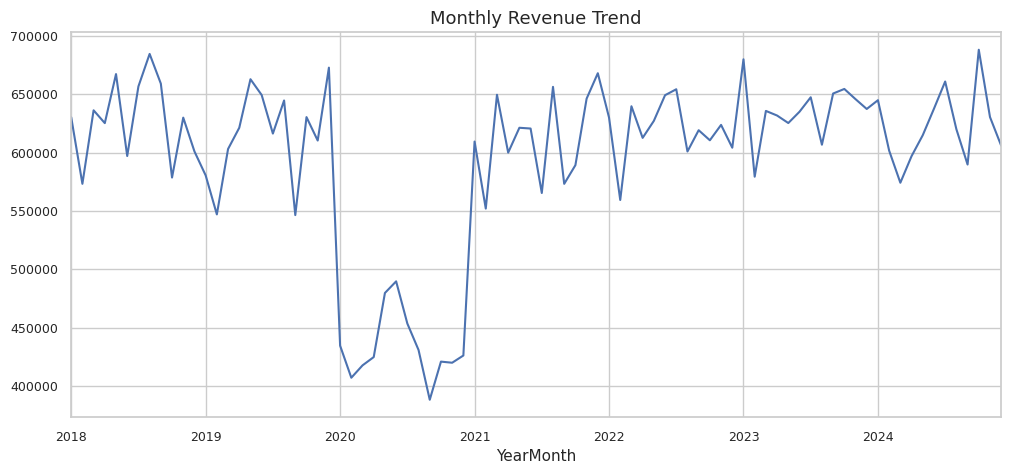

In [ ]:
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_revenue = df.groupby('YearMonth')['Revenue'].sum()
monthly_revenue.plot(kind='line', figsize=(12,5), title='Monthly Revenue Trend')


In [ ]:
cust_summary = df.groupby('CustomerType', observed=True)['Revenue'].agg(['sum','mean'])


In [ ]:
cust_summary = df.groupby('CustomerType')['Revenue'].agg(['sum','mean'])
member_summary = df.groupby('MembershipStatus')['Revenue'].agg(['sum','mean'])


/tmp/ipython-input-1789984256.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cust_summary = df.groupby('CustomerType')['Revenue'].agg(['sum','mean'])


In [ ]:
prod_summary = df.groupby('ProductCategory')['Revenue'].sum().sort_values(ascending=False).head(10)


/tmp/ipython-input-2114254129.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prod_summary = df.groupby('ProductCategory')['Revenue'].sum().sort_values(ascending=False).head(10)


In [ ]:
total_revenue = df['Revenue'].sum()
print("Total Revenue (CAD):", total_revenue)


Total Revenue (CAD): 49999074.41


   Year  Revenue_CAD                                      Revenue_Words
0  2018   7540341.29  seventy-five thousand, four hundred and three ...
1  2019   7385825.75  seventy-three thousand, eight hundred and fift...
2  2020   5192086.63  fifty-one thousand, nine hundred and twenty Ca...
3  2021   7352079.92  seventy-three thousand, five hundred and twent...
4  2022   7431843.76  seventy-four thousand, three hundred and eight...
5  2023   7630549.39  seventy-six thousand, three hundred and five C...
6  2024   7466347.67  seventy-four thousand, six hundred and sixty-t...


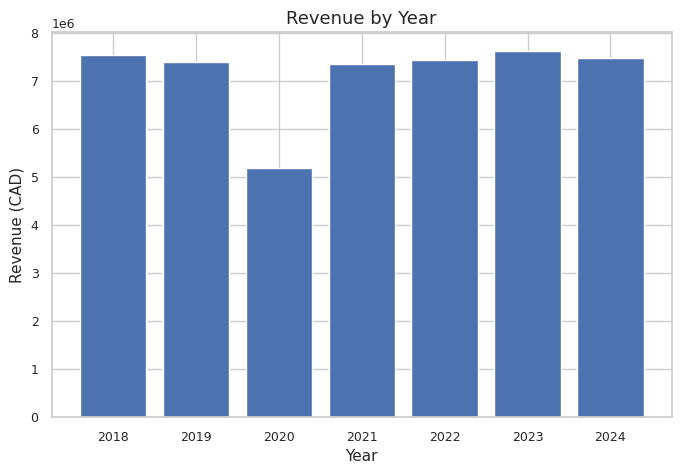

In [ ]:
!pip install num2words
from num2words import num2words

import pandas as pd
from num2words import num2words
import matplotlib.pyplot as plt

# --- revenue per year DataFrame ---
rev_year = (
    df.groupby(df['Date'].dt.year)['Revenue']
      .sum()
      .reset_index()
      .rename(columns={'Date': 'Year', 'Revenue': 'Revenue_CAD'})
)

# --- add spelled-out column ---
rev_year['Revenue_Words'] = rev_year['Revenue_CAD'].apply(
    lambda x: num2words(int(x), to="currency", lang="en").replace("euro", "Canadian dollars")
)

# --- display table ---
print(rev_year)

# --- quick bar plot ---
plt.figure(figsize=(8,5))
plt.bar(rev_year['Year'], rev_year['Revenue_CAD'])
plt.title("Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Revenue (CAD)")
plt.show()

   Year  Revenue_CAD      YoY_%
0  2018   7540341.29        NaN
1  2019   7385825.75  -2.049185
2  2020   5192086.63 -29.702016
3  2021   7352079.92  41.601642
4  2022   7431843.76   1.084915
5  2023   7630549.39   2.673706
6  2024   7466347.67  -2.151899


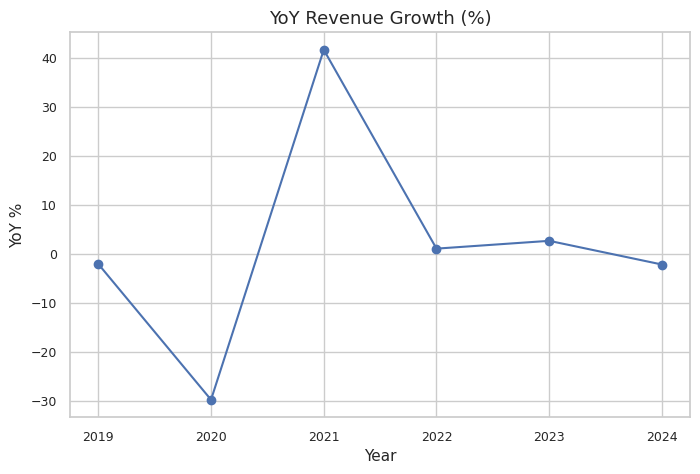

In [ ]:
import matplotlib.pyplot as plt

# --- revenue per year (already created earlier) ---
rev_year = (
    df.groupby(df['Date'].dt.year)['Revenue']
      .sum()
      .reset_index()
      .rename(columns={'Date': 'Year', 'Revenue': 'Revenue_CAD'})
)

# --- calculate YoY % change ---
rev_year['YoY_%'] = rev_year['Revenue_CAD'].pct_change() * 100

# --- display table ---
print(rev_year)

# --- line plot ---
plt.figure(figsize=(8,5))
plt.plot(rev_year['Year'], rev_year['YoY_%'], marker='o')
plt.title("YoY Revenue Growth (%)")
plt.xlabel("Year")
plt.ylabel("YoY %")
plt.grid(True)
plt.show()

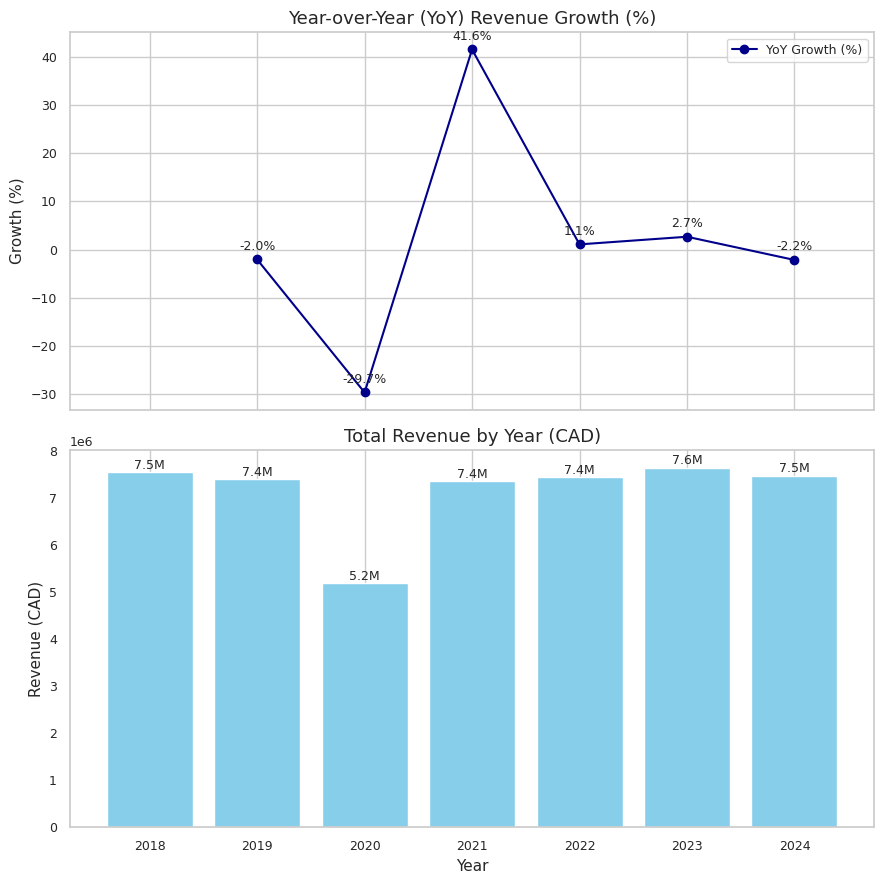

In [ ]:
import matplotlib.pyplot as plt

# --- Revenue per year from your dataset ---
rev_year = (
    df.groupby(df['Date'].dt.year)['Revenue']
      .sum()
      .reset_index()
      .rename(columns={'Date': 'Year', 'Revenue': 'Revenue_CAD'})
)

# Calculate YoY % change
rev_year['YoY_%'] = rev_year['Revenue_CAD'].pct_change() * 100

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 9), sharex=True)

# --- Plot 1: YoY % Growth
ax1.plot(rev_year['Year'], rev_year['YoY_%'], marker='o', color='darkblue', label='YoY Growth (%)')
ax1.set_title('Year-over-Year (YoY) Revenue Growth (%)', fontsize=13)
ax1.set_ylabel('Growth (%)')
ax1.grid(True)
ax1.legend()

# Add labels to each point
for i in range(1, len(rev_year)):
    ax1.text(rev_year['Year'][i], rev_year['YoY_%'][i] + 2,
             f"{rev_year['YoY_%'][i]:.1f}%", ha='center', fontsize=9)

# --- Plot 2: Revenue by Year
bars = ax2.bar(rev_year['Year'], rev_year['Revenue_CAD'], color='skyblue')
ax2.set_title('Total Revenue by Year (CAD)', fontsize=13)
ax2.set_xlabel('Year')
ax2.set_ylabel('Revenue (CAD)')
ax2.grid(axis='y')

# Add labels above bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + (0.01 * height),
             f"{height/1e6:.1f}M", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


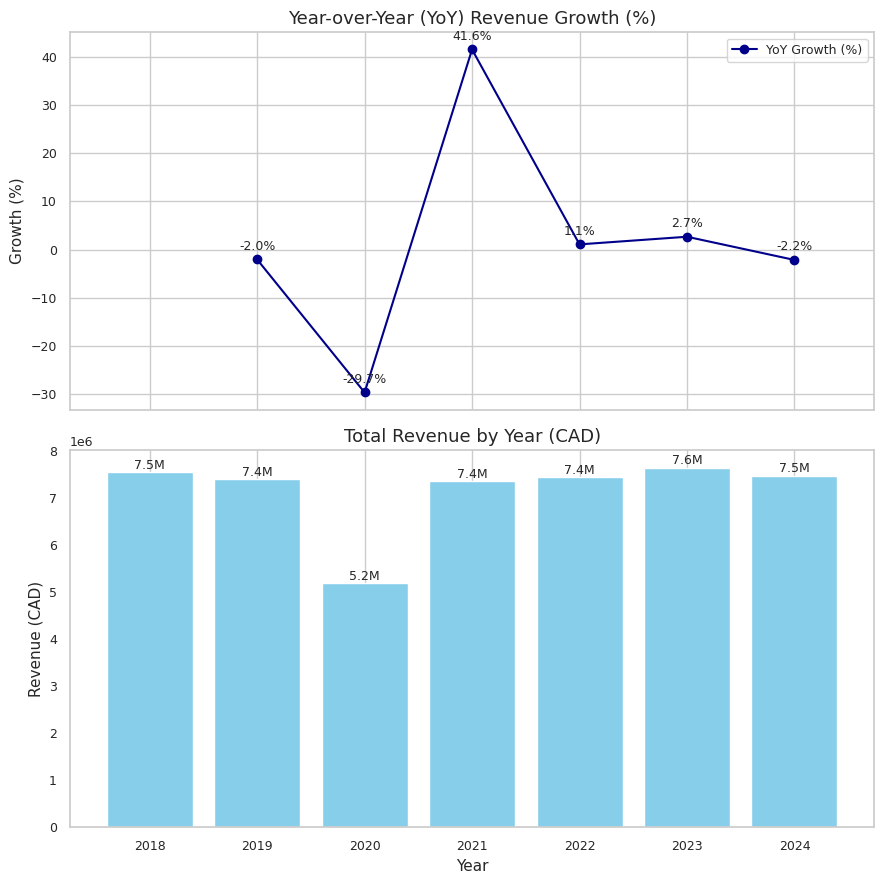

In [ ]:
# Drop NaN values from YoY for plotting
rev_year_plot = rev_year.dropna(subset=['YoY_%']).copy()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 9), sharex=True)

# --- Plot 1: YoY % Growth
ax1.plot(rev_year_plot['Year'], rev_year_plot['YoY_%'], marker='o', color='darkblue', label='YoY Growth (%)')
ax1.set_title('Year-over-Year (YoY) Revenue Growth (%)', fontsize=13)
ax1.set_ylabel('Growth (%)')
ax1.grid(True)
ax1.legend()

# Add labels to each point
for i, row in rev_year_plot.iterrows():
    ax1.text(row['Year'], row['YoY_%'] + 2, f"{row['YoY_%']:.1f}%", ha='center', fontsize=9)

# --- Plot 2: Revenue by Year
bars = ax2.bar(rev_year['Year'], rev_year['Revenue_CAD'], color='skyblue')
ax2.set_title('Total Revenue by Year (CAD)', fontsize=13)
ax2.set_xlabel('Year')
ax2.set_ylabel('Revenue (CAD)')
ax2.grid(axis='y')

# Add labels above bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + (0.01 * height),
             f"{height/1e6:.1f}M", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
print(rev_year)


   Year  Revenue_CAD      YoY_%
0  2018   7540341.29        NaN
1  2019   7385825.75  -2.049185
2  2020   5192086.63 -29.702016
3  2021   7352079.92  41.601642
4  2022   7431843.76   1.084915
5  2023   7630549.39   2.673706
6  2024   7466347.67  -2.151899


In [ ]:
print(df.columns)

Index(['TransactionID', 'Date', 'Year', 'Month', 'DayOfWeek', 'IsWeekend', 'Province', 'CustomerType',
       'MembershipStatus', 'ProductCategory', 'UnitsSold', 'UnitPrice', 'Revenue', 'PromotionApplied', 'Returned',
       'YearMonth'],
      dtype='object')


In [ ]:
# If Returned = True → no profit (refund), else profit = Revenue
df['Profit'] = df.apply(lambda row: 0 if row['Returned'] else row['Revenue'], axis=1)


In [ ]:
profit_pdf = (
    df.groupby(df['Date'].dt.year)['Profit']
      .sum()
      .reset_index()
      .rename(columns={'Date': 'Year', 'Profit': 'Total_Profit'})
)

profit_pdf['Profit_Growth_%'] = profit_pdf['Total_Profit'].pct_change() * 100
profit_pdf['Profit_Millions'] = profit_pdf['Total_Profit'] / 1e6
print(profit_pdf)


   Year  Total_Profit  Profit_Growth_%  Profit_Millions
0  2018    7147979.38              NaN         7.147979
1  2019    6985490.70        -2.273211         6.985491
2  2020    4908661.19       -29.730617         4.908661
3  2021    6928177.44        41.141895         6.928177
4  2022    7039146.04         1.601700         7.039146
5  2023    7197678.26         2.252151         7.197678
6  2024    7044839.53        -2.123445         7.044840


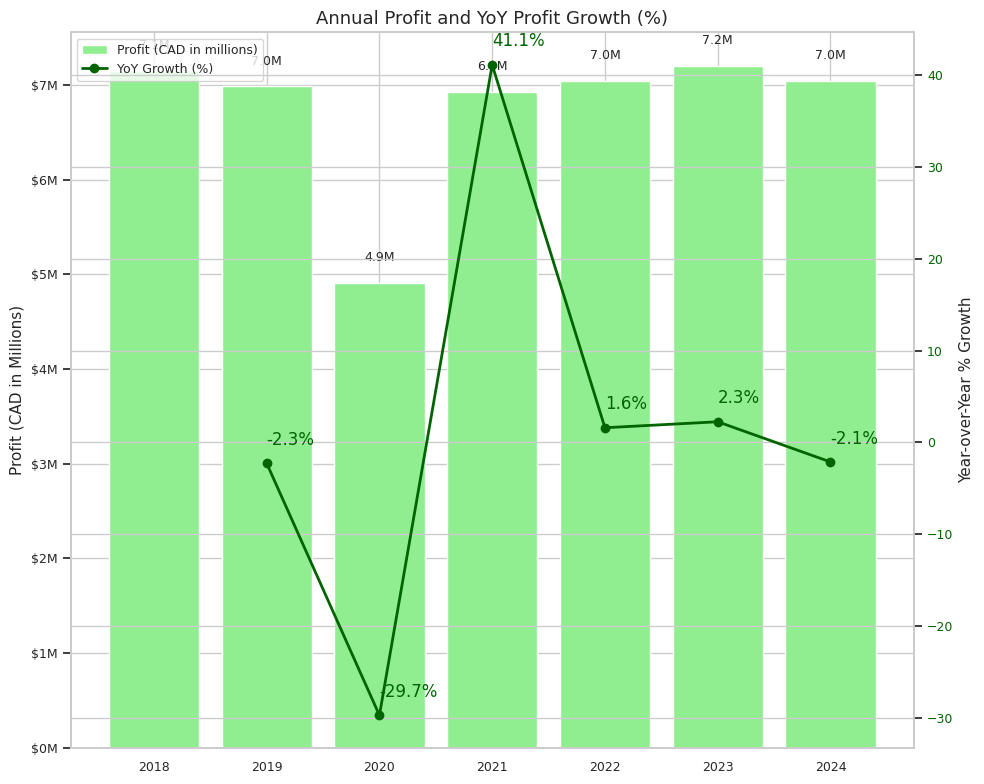

   Year  Total_Profit  Profit_Growth_%  Profit_Millions
0  2018    7147979.38              NaN         7.147979
1  2019    6985490.70        -2.273211         6.985491
2  2020    4908661.19       -29.730617         4.908661
3  2021    6928177.44        41.141895         6.928177
4  2022    7039146.04         1.601700         7.039146
5  2023    7197678.26         2.252151         7.197678
6  2024    7044839.53        -2.123445         7.044840


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# --- Step 1: Aggregate Profit by Year from your dataset ---
profit_pdf = (
    df.groupby(df['Date'].dt.year)['Profit']   # <-- assumes your dataset has a "Profit" column
      .sum()
      .reset_index()
      .rename(columns={'Date': 'Year', 'Profit': 'Total_Profit'})
)

# --- Step 2: Calculate YoY Profit Growth (%) ---
profit_pdf['Profit_Growth_%'] = profit_pdf['Total_Profit'].pct_change() * 100

# --- Step 3: Convert Profit to Millions ---
profit_pdf["Profit_Millions"] = profit_pdf["Total_Profit"] / 1e6

# --- Step 4: Plotting ---
fig, ax1 = plt.subplots(figsize=(10, 8))

# Bar plot for Profit
bars = ax1.bar(profit_pdf["Year"], profit_pdf["Profit_Millions"],
               color="lightgreen", label="Profit (CAD in millions)")
ax1.set_ylabel("Profit (CAD in Millions)")
ax1.set_title("Annual Profit and YoY Profit Growth (%)")
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:.0f}M'))

# Add value labels on bars
for bar, val in zip(bars, profit_pdf["Profit_Millions"]):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2,
             f"{val:.1f}M", ha='center', va='bottom', fontsize=9)

# Line plot for YoY Profit Growth
ax2 = ax1.twinx()
ax2.plot(profit_pdf["Year"], profit_pdf["Profit_Growth_%"],
         color="darkgreen", marker="o", linewidth=2, label="YoY Growth (%)")
ax2.set_ylabel("Year-over-Year % Growth")
ax2.tick_params(axis="y", labelcolor="darkgreen")

# Annotate YoY % values
for x, y in zip(profit_pdf["Year"], profit_pdf["Profit_Growth_%"]):
    if pd.notna(y):
        ax2.annotate(f"{y:.1f}%", (x, y + 2), color="darkgreen")

# Combine legends
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc="upper left")

plt.tight_layout()
plt.show()

# --- Optional: Check data table ---
print(profit_pdf)


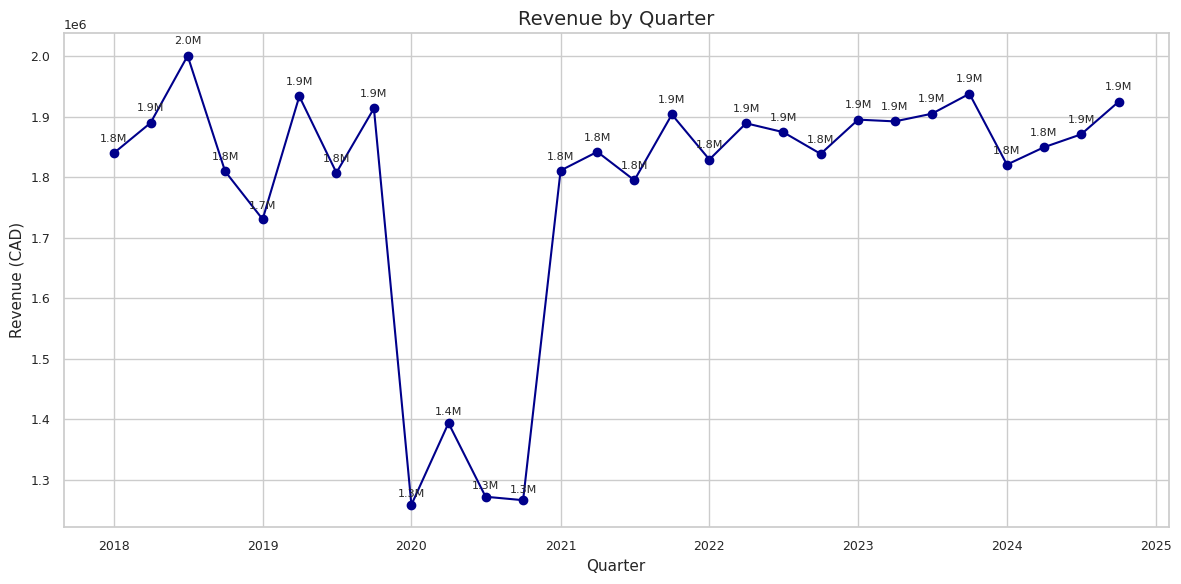

  Quarter     Revenue QuarterStart
0  2018Q1  1840009.95   2018-01-01
1  2018Q2  1889861.01   2018-04-01
2  2018Q3  2000696.87   2018-07-01
3  2018Q4  1809773.46   2018-10-01
4  2019Q1  1730698.12   2019-01-01
5  2019Q2  1933756.97   2019-04-01
6  2019Q3  1807587.64   2019-07-01
7  2019Q4  1913783.02   2019-10-01
8  2020Q1  1259047.07   2020-01-01
9  2020Q2  1394011.36   2020-04-01


In [ ]:
import matplotlib.pyplot as plt

# --- Step 1: Add Quarter column ---
df['Quarter'] = df['Date'].dt.to_period('Q')   # e.g., 2020Q1, 2020Q2...

# --- Step 2: Aggregate Revenue by Quarter ---
rev_quarter = (
    df.groupby('Quarter')['Revenue']
      .sum()
      .reset_index()
)

# Convert quarter back to datetime for plotting (use period start)
rev_quarter['QuarterStart'] = rev_quarter['Quarter'].dt.to_timestamp()

# --- Step 3: Plot ---
plt.figure(figsize=(12,6))
plt.plot(rev_quarter['QuarterStart'], rev_quarter['Revenue'], marker='o', color='darkblue')
plt.title('Revenue by Quarter', fontsize=14)
plt.xlabel('Quarter')
plt.ylabel('Revenue (CAD)')
plt.grid(True)

# Add labels
for x, y in zip(rev_quarter['QuarterStart'], rev_quarter['Revenue']):
    plt.text(x, y + (0.01 * y), f"{y/1e6:.1f}M", ha='center', fontsize=8)

plt.tight_layout()
plt.show()

# Show the aggregated table as well
print(rev_quarter.head(10))


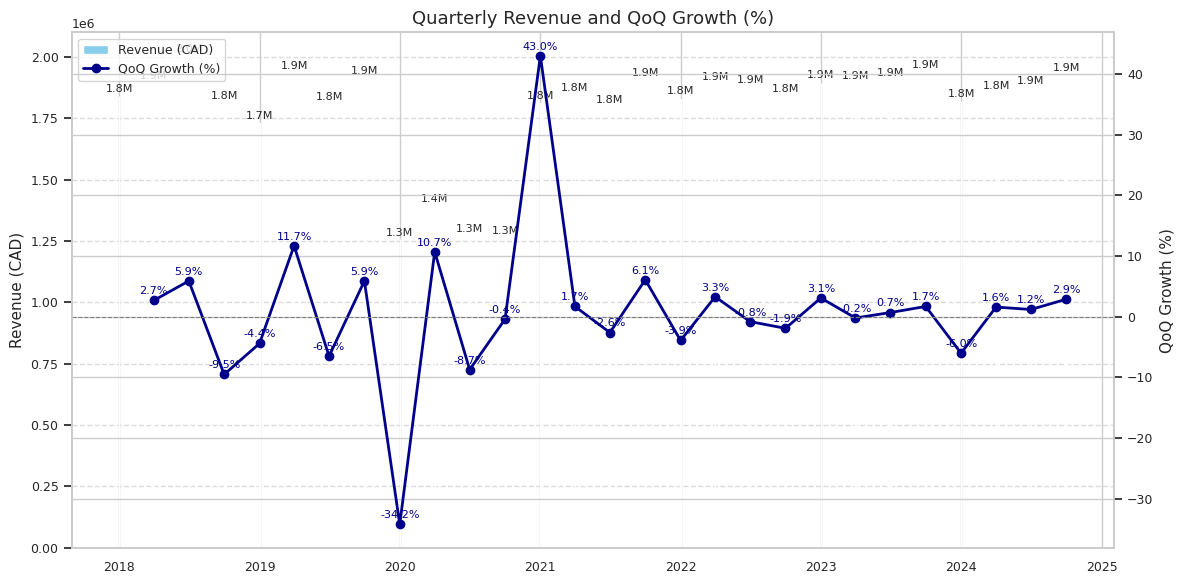

   Quarter     Revenue QuarterStart  QoQ_%
0   2018Q1  1840009.95   2018-01-01    NaN
1   2018Q2  1889861.01   2018-04-01    2.7
2   2018Q3  2000696.87   2018-07-01    5.9
3   2018Q4  1809773.46   2018-10-01   -9.5
4   2019Q1  1730698.12   2019-01-01   -4.4
5   2019Q2  1933756.97   2019-04-01   11.7
6   2019Q3  1807587.64   2019-07-01   -6.5
7   2019Q4  1913783.02   2019-10-01    5.9
8   2020Q1  1259047.07   2020-01-01  -34.2
9   2020Q2  1394011.36   2020-04-01   10.7
10  2020Q3  1272355.12   2020-07-01   -8.7
11  2020Q4  1266673.08   2020-10-01   -0.4


In [ ]:
import matplotlib.pyplot as plt

# --- Step 1: Add Quarter column ---
df['Quarter'] = df['Date'].dt.to_period('Q')

# --- Step 2: Aggregate Revenue by Quarter ---
rev_quarter = (
    df.groupby('Quarter')['Revenue']
      .sum()
      .reset_index()
)

# Convert quarter back to datetime for plotting
rev_quarter['QuarterStart'] = rev_quarter['Quarter'].dt.to_timestamp()

# --- Step 3: Calculate QoQ Growth (%) ---
rev_quarter['QoQ_%'] = rev_quarter['Revenue'].pct_change() * 100
rev_quarter['QoQ_%'] = rev_quarter['QoQ_%'].round(1)

# --- Step 4: Dual-axis Chart ---
fig, ax1 = plt.subplots(figsize=(12,6))

# Bars for Revenue
bars = ax1.bar(rev_quarter['QuarterStart'], rev_quarter['Revenue'],
               color='skyblue', label='Revenue (CAD)')
ax1.set_ylabel('Revenue (CAD)')
ax1.set_title('Quarterly Revenue and QoQ Growth (%)')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add revenue labels above bars
for bar, val in zip(bars, rev_quarter['Revenue']):
    ax1.text(bar.get_x() + bar.get_width()/2, val + (0.01 * val),
             f"{val/1e6:.1f}M", ha='center', fontsize=8)

# Line for QoQ Growth %
ax2 = ax1.twinx()
ax2.plot(rev_quarter['QuarterStart'], rev_quarter['QoQ_%'],
         marker='o', color='darkblue', linewidth=2, label='QoQ Growth (%)')
ax2.set_ylabel('QoQ Growth (%)')
ax2.axhline(0, color='gray', linestyle='--', linewidth=0.8)

# Add QoQ % labels
for x, y in zip(rev_quarter['QuarterStart'], rev_quarter['QoQ_%']):
    if pd.notna(y):
        ax2.text(x, y + 1, f"{y:.1f}%", ha='center', fontsize=8, color='darkblue')

# Legends
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc="upper left")

plt.tight_layout()
plt.show()

# --- Step 5: Show table ---
print(rev_quarter.head(12))


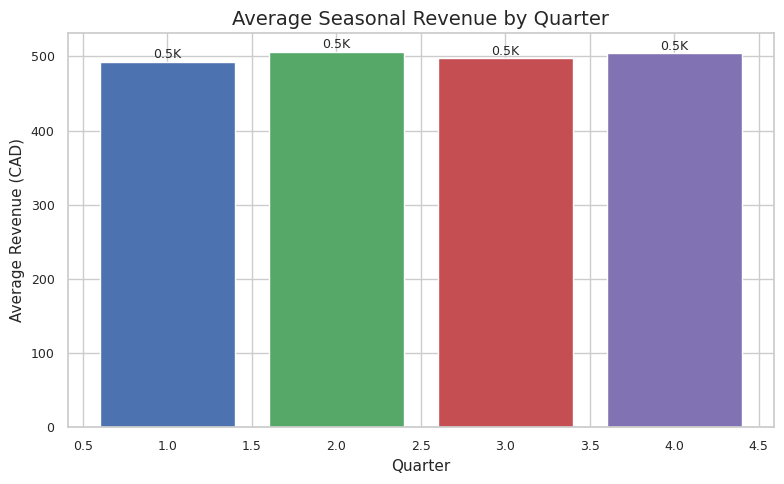

   Quarter  Avg_Revenue
0        1   492.642205
1        2   505.794492
2        3   497.430575
3        4   504.017521


In [ ]:
import matplotlib.pyplot as plt

# --- Average Revenue by Quarter ---
seasonal_rev = (
    df.groupby(df['Date'].dt.quarter)['Revenue']
      .mean()
      .reset_index()
      .rename(columns={'Date': 'Quarter', 'Revenue': 'Avg_Revenue'})
)

# --- Plot ---
plt.figure(figsize=(8,5))
bars = plt.bar(seasonal_rev['Quarter'], seasonal_rev['Avg_Revenue'],
               color=['#4c72b0','#55a868','#c44e52','#8172b3'])

plt.title("Average Seasonal Revenue by Quarter", fontsize=14)
plt.xlabel("Quarter")
plt.ylabel("Average Revenue (CAD)")

# Add labels above bars (in Thousands)
for bar, val in zip(bars, seasonal_rev['Avg_Revenue']):
    plt.text(bar.get_x() + bar.get_width()/2, val + (0.01 * val),
             f"{val/1e3:.1f}K", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print(seasonal_rev)


In [ ]:
# --- Revenue by Year & Quarter ---
year_quarter_rev = (
    df.assign(Year=df['Date'].dt.year, Quarter=df['Date'].dt.quarter)
      .groupby(['Year','Quarter'])['Revenue']
      .sum()
      .reset_index()
      .rename(columns={'Revenue': 'Total_Revenue'})
)

print(year_quarter_rev.head())


   Year  Quarter  Total_Revenue
0  2018        1     1840009.95
1  2018        2     1889861.01
2  2018        3     2000696.87
3  2018        4     1809773.46
4  2019        1     1730698.12


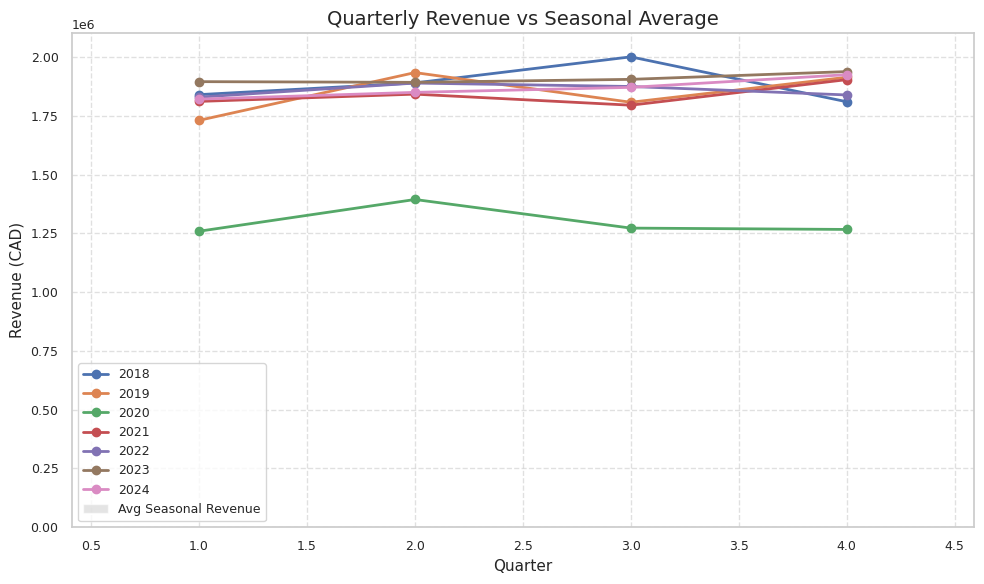

In [ ]:
import matplotlib.pyplot as plt

# --- Seasonal Average Revenue ---
seasonal_rev = (
    df.assign(Quarter=df['Date'].dt.quarter)
      .groupby('Quarter')['Revenue']
      .mean()
      .reset_index()
      .rename(columns={'Revenue': 'Avg_Revenue'})
)

plt.figure(figsize=(10,6))

# Bars = Seasonal Averages
bars = plt.bar(seasonal_rev['Quarter'], seasonal_rev['Avg_Revenue'],
               color='lightgray', alpha=0.6, label='Avg Seasonal Revenue')

# Overlay Lines = Each Year’s Quarters
for year in year_quarter_rev['Year'].unique():
    subset = year_quarter_rev[year_quarter_rev['Year'] == year]
    plt.plot(subset['Quarter'], subset['Total_Revenue'], marker='o', linewidth=2, label=f"{year}")

plt.title("Quarterly Revenue vs Seasonal Average", fontsize=14)
plt.xlabel("Quarter")
plt.ylabel("Revenue (CAD)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


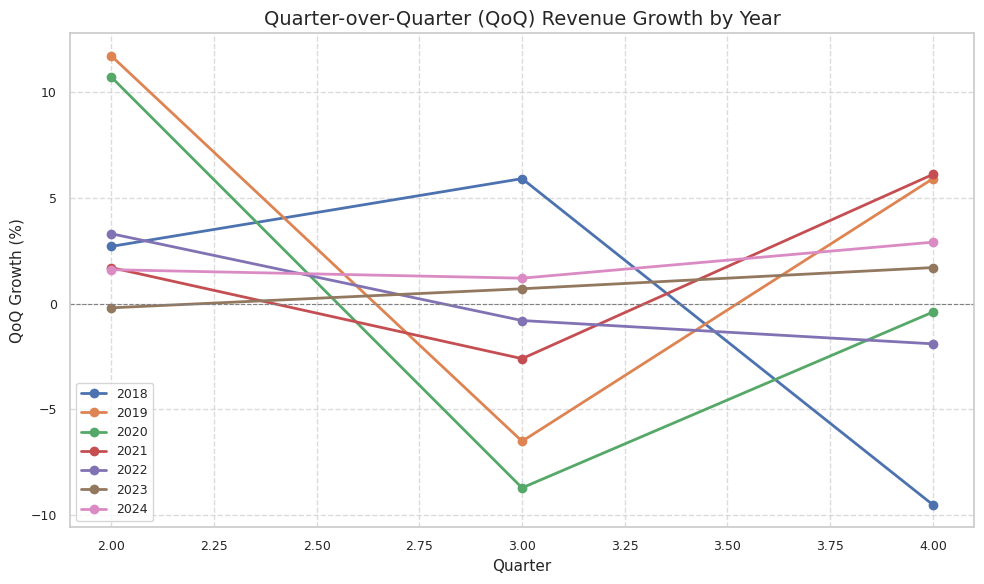

    Year  Quarter  Total_Revenue  QoQ_%
0   2018        1     1840009.95    NaN
1   2018        2     1889861.01    2.7
2   2018        3     2000696.87    5.9
3   2018        4     1809773.46   -9.5
4   2019        1     1730698.12    NaN
5   2019        2     1933756.97   11.7
6   2019        3     1807587.64   -6.5
7   2019        4     1913783.02    5.9
8   2020        1     1259047.07    NaN
9   2020        2     1394011.36   10.7
10  2020        3     1272355.12   -8.7
11  2020        4     1266673.08   -0.4


In [ ]:
import matplotlib.pyplot as plt

# --- Step 1: Compute Quarterly Revenue per Year ---
year_quarter_rev = (
    df.assign(Year=df['Date'].dt.year, Quarter=df['Date'].dt.quarter)
      .groupby(['Year','Quarter'])['Revenue']
      .sum()
      .reset_index()
      .rename(columns={'Revenue': 'Total_Revenue'})
)

# --- Step 2: Calculate QoQ Growth within each year ---
year_quarter_rev['QoQ_%'] = year_quarter_rev.groupby('Year')['Total_Revenue'].pct_change() * 100
year_quarter_rev['QoQ_%'] = year_quarter_rev['QoQ_%'].round(1)

# --- Step 3: Plot Growth per Year ---
plt.figure(figsize=(10,6))

for year in year_quarter_rev['Year'].unique():
    subset = year_quarter_rev[year_quarter_rev['Year'] == year]
    plt.plot(subset['Quarter'], subset['QoQ_%'], marker='o', linewidth=2, label=str(year))

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Quarter-over-Quarter (QoQ) Revenue Growth by Year", fontsize=14)
plt.xlabel("Quarter")
plt.ylabel("QoQ Growth (%)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# --- Step 4: Inspect table ---
print(year_quarter_rev.head(12))


Customer Summary:
  CustomerType      Revenue  Returned  ReturnRate_%
0   First-time  13752438.35      1555      5.161654
1       Member  11010152.62      1042      5.216521
2      Regular  25236483.44      2529      5.068238


/tmp/ipython-input-1936887561.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('CustomerType')[['Revenue', 'Returned']]
/tmp/ipython-input-1936887561.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cust_summary['ReturnRate_%'] = (cust_summary['Returned'] / df.groupby('CustomerType')['Returned'].count().values) * 100
/tmp/ipython-input-1936887561.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cust_summary, x='CustomerType', y='Reven

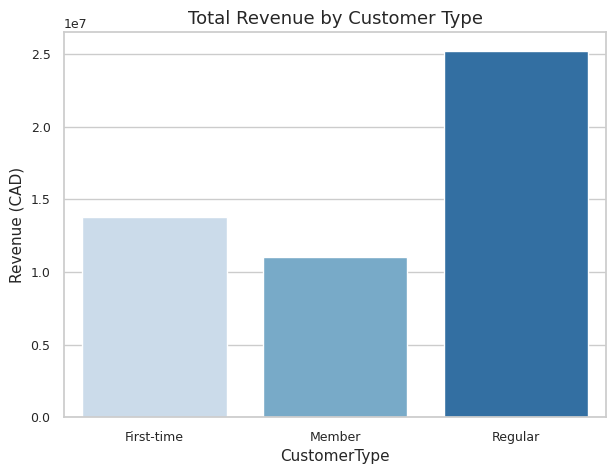

/tmp/ipython-input-1936887561.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cust_summary, x='CustomerType', y='ReturnRate_%', palette='Reds')


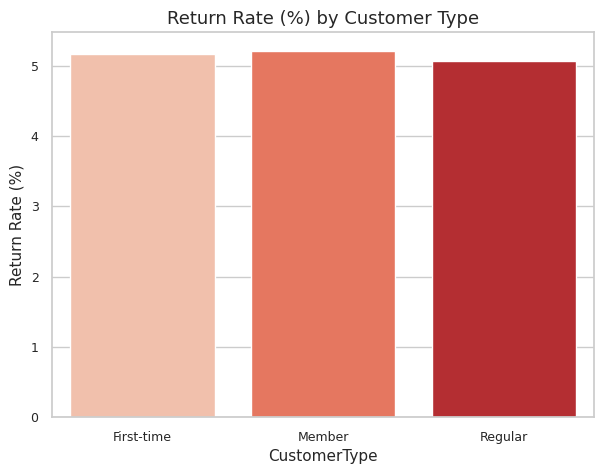

Membership Summary:
   MembershipStatus      Revenue  Returned  ReturnRate_%
0             False  38988921.79      4084      5.103405
1              True  11010152.62      1042      5.216521


/tmp/ipython-input-1936887561.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=member_summary, x='MembershipStatus', y='Revenue', palette='Greens')


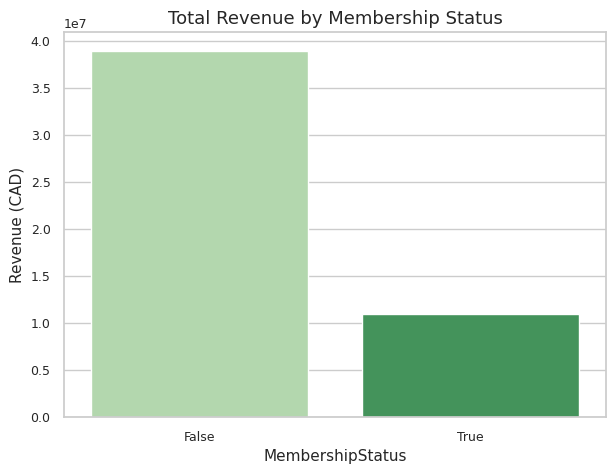

/tmp/ipython-input-1936887561.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=member_summary, x='MembershipStatus', y='ReturnRate_%', palette='Oranges')


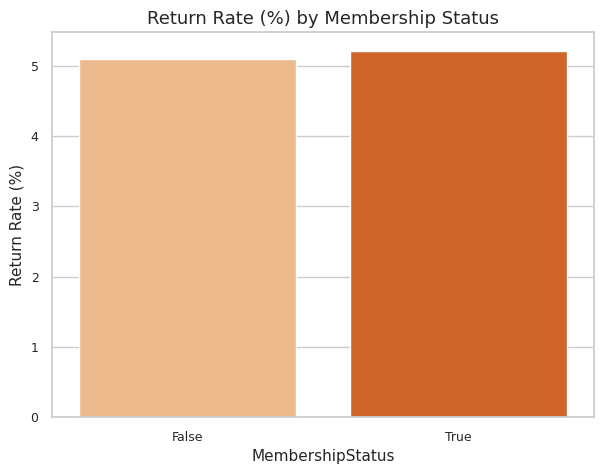

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Revenue & Returns by Customer Type ---
cust_summary = (
    df.groupby('CustomerType')[['Revenue', 'Returned']]
      .agg({'Revenue': 'sum', 'Returned': 'sum'})
      .reset_index()
)

# Return Rate = % of transactions returned
cust_summary['ReturnRate_%'] = (cust_summary['Returned'] / df.groupby('CustomerType')['Returned'].count().values) * 100

print("Customer Summary:")
print(cust_summary)

# Plot Revenue by Customer Type
plt.figure(figsize=(7,5))
sns.barplot(data=cust_summary, x='CustomerType', y='Revenue', palette='Blues')
plt.title("Total Revenue by Customer Type")
plt.ylabel("Revenue (CAD)")
plt.show()

# Plot Return Rate by Customer Type
plt.figure(figsize=(7,5))
sns.barplot(data=cust_summary, x='CustomerType', y='ReturnRate_%', palette='Reds')
plt.title("Return Rate (%) by Customer Type")
plt.ylabel("Return Rate (%)")
plt.show()


# --- Step 2: Revenue & Returns by Membership Status ---
member_summary = (
    df.groupby('MembershipStatus')[['Revenue', 'Returned']]
      .agg({'Revenue': 'sum', 'Returned': 'sum'})
      .reset_index()
)

member_summary['ReturnRate_%'] = (member_summary['Returned'] / df.groupby('MembershipStatus')['Returned'].count().values) * 100

print("Membership Summary:")
print(member_summary)

# Plot Revenue by Membership Status
plt.figure(figsize=(7,5))
sns.barplot(data=member_summary, x='MembershipStatus', y='Revenue', palette='Greens')
plt.title("Total Revenue by Membership Status")
plt.ylabel("Revenue (CAD)")
plt.show()

# Plot Return Rate by Membership Status
plt.figure(figsize=(7,5))
sns.barplot(data=member_summary, x='MembershipStatus', y='ReturnRate_%', palette='Oranges')
plt.title("Return Rate (%) by Membership Status")
plt.ylabel("Return Rate (%)")
plt.show()


/tmp/ipython-input-3377390360.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['CustomerType', 'MembershipStatus'])


CustomerType × MembershipStatus Summary:
  CustomerType  MembershipStatus  Total_Revenue  Total_Returns  Transactions  ReturnRate_%
0   First-time             False    13752438.35           1555         30126      5.161654
1   First-time              True           0.00              0             0           NaN
2       Member             False           0.00              0             0           NaN
3       Member              True    11010152.62           1042         19975      5.216521
4      Regular             False    25236483.44           2529         49899      5.068238
5      Regular              True           0.00              0             0           NaN


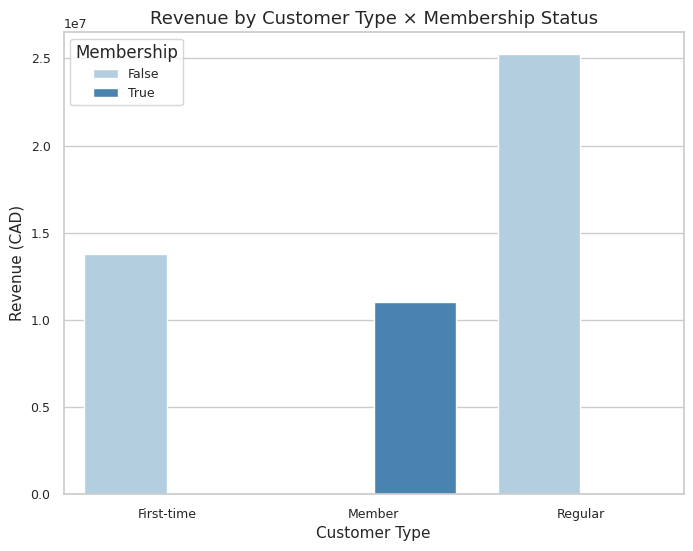

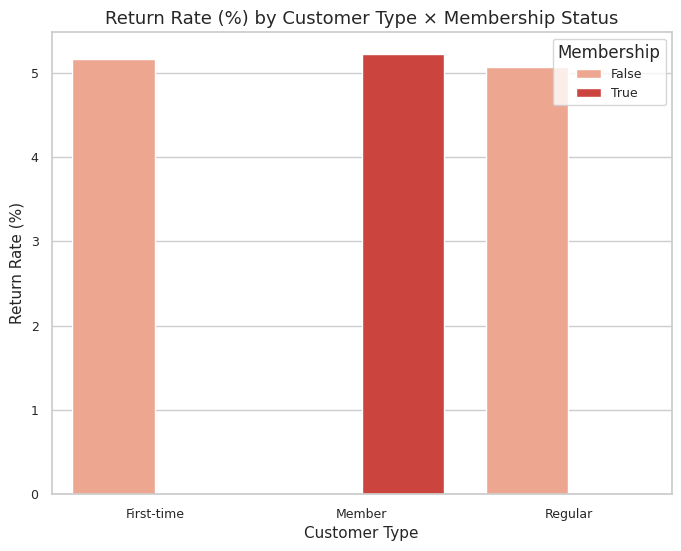

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Combined Grouping ---
cust_member_summary = (
    df.groupby(['CustomerType', 'MembershipStatus'])
      .agg(Total_Revenue=('Revenue', 'sum'),
           Total_Returns=('Returned', 'sum'),
           Transactions=('TransactionID', 'count'))
      .reset_index()
)

# Calculate Return Rate %
cust_member_summary['ReturnRate_%'] = (cust_member_summary['Total_Returns'] / cust_member_summary['Transactions']) * 100

print("CustomerType × MembershipStatus Summary:")
print(cust_member_summary)


# --- Step 2: Revenue Plot ---
plt.figure(figsize=(8,6))
sns.barplot(data=cust_member_summary,
            x='CustomerType', y='Total_Revenue',
            hue='MembershipStatus', palette='Blues')
plt.title("Revenue by Customer Type × Membership Status")
plt.ylabel("Revenue (CAD)")
plt.xlabel("Customer Type")
plt.legend(title="Membership")
plt.show()


# --- Step 3: Return Rate Plot ---
plt.figure(figsize=(8,6))
sns.barplot(data=cust_member_summary,
            x='CustomerType', y='ReturnRate_%',
            hue='MembershipStatus', palette='Reds')
plt.title("Return Rate (%) by Customer Type × Membership Status")
plt.ylabel("Return Rate (%)")
plt.xlabel("Customer Type")
plt.legend(title="Membership")
plt.show()


/tmp/ipython-input-4288814861.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['ProductCategory', 'MembershipStatus'])
/tmp/ipython-input-4288814861.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['ProductCategory', 'CustomerType'])


ProductCategory × Membership Summary:
  ProductCategory  MembershipStatus  Total_Revenue  Total_Returns  Transactions  ReturnRate_%
0         Apparel             False     1715381.03            682         13440      5.074405
1         Apparel              True      492135.21            152          3311      4.590758
2           Books             False      709164.22            645         13332      4.837984
3           Books              True      202501.69            163          3352      4.862768
4     Electronics             False    17714265.56            687         13254      5.183341
ProductCategory × CustomerType Summary:
  ProductCategory CustomerType  Total_Revenue  Total_Returns  Transactions  ReturnRate_%
0         Apparel   First-time      606386.04            256          5028      5.091488
1         Apparel       Member      492135.21            152          3311      4.590758
2         Apparel      Regular     1108994.99            426          8412      5.064194
3 

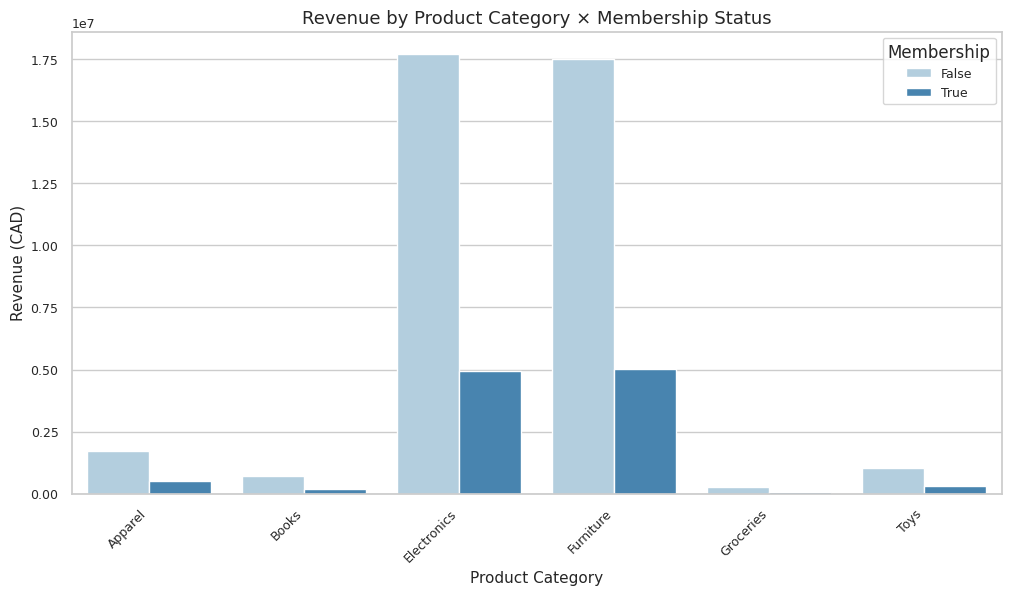

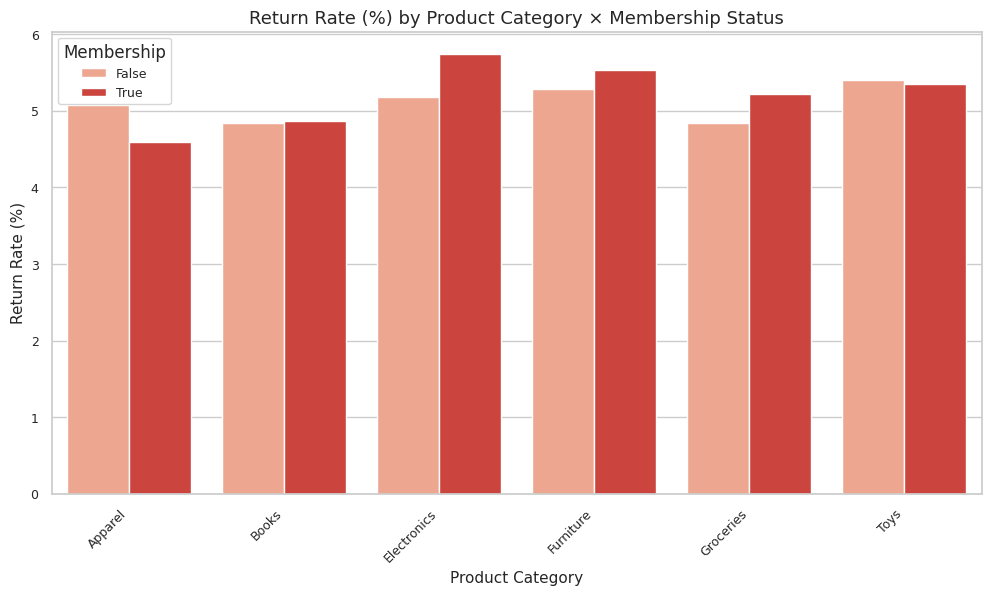

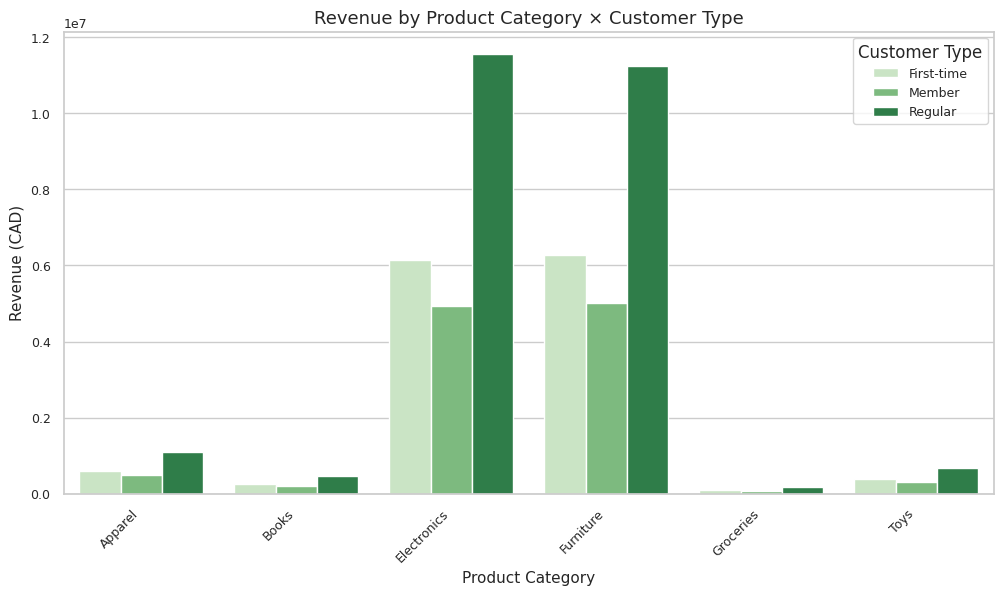

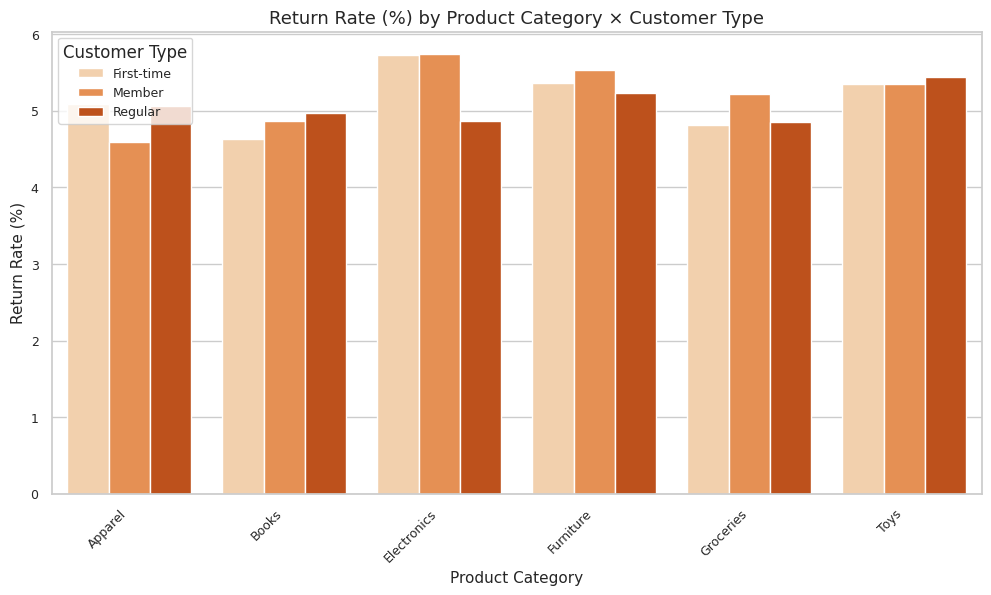

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: ProductCategory × Membership ---
prod_member_summary = (
    df.groupby(['ProductCategory', 'MembershipStatus'])
      .agg(Total_Revenue=('Revenue', 'sum'),
           Total_Returns=('Returned', 'sum'),
           Transactions=('TransactionID', 'count'))
      .reset_index()
)

prod_member_summary['ReturnRate_%'] = (
    prod_member_summary['Total_Returns'] / prod_member_summary['Transactions'] * 100
)

print("ProductCategory × Membership Summary:")
print(prod_member_summary.head())


# --- Step 2: ProductCategory × CustomerType ---
prod_cust_summary = (
    df.groupby(['ProductCategory', 'CustomerType'])
      .agg(Total_Revenue=('Revenue', 'sum'),
           Total_Returns=('Returned', 'sum'),
           Transactions=('TransactionID', 'count'))
      .reset_index()
)

prod_cust_summary['ReturnRate_%'] = (
    prod_cust_summary['Total_Returns'] / prod_cust_summary['Transactions'] * 100
)

print("ProductCategory × CustomerType Summary:")
print(prod_cust_summary.head())


# --- Step 3: Visualization: Revenue by Product × Membership ---
plt.figure(figsize=(12,6))
sns.barplot(data=prod_member_summary,
            x='ProductCategory', y='Total_Revenue',
            hue='MembershipStatus', palette='Blues')
plt.title("Revenue by Product Category × Membership Status")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Revenue (CAD)")
plt.xlabel("Product Category")
plt.legend(title="Membership")
plt.show()


# --- Step 4: Visualization: Return Rate by Product × Membership ---
plt.figure(figsize=(12,6))
sns.barplot(data=prod_member_summary,
            x='ProductCategory', y='ReturnRate_%',
            hue='MembershipStatus', palette='Reds')
plt.title("Return Rate (%) by Product Category × Membership Status")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Return Rate (%)")
plt.xlabel("Product Category")
plt.legend(title="Membership")
plt.show()


# --- Step 5: Visualization: Revenue by Product × CustomerType ---
plt.figure(figsize=(12,6))
sns.barplot(data=prod_cust_summary,
            x='ProductCategory', y='Total_Revenue',
            hue='CustomerType', palette='Greens')
plt.title("Revenue by Product Category × Customer Type")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Revenue (CAD)")
plt.xlabel("Product Category")
plt.legend(title="Customer Type")
plt.show()


# --- Step 6: Visualization: Return Rate by Product × CustomerType ---
plt.figure(figsize=(12,6))
sns.barplot(data=prod_cust_summary,
            x='ProductCategory', y='ReturnRate_%',
            hue='CustomerType', palette='Oranges')
plt.title("Return Rate (%) by Product Category × Customer Type")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Return Rate (%)")
plt.xlabel("Product Category")
plt.legend(title="Customer Type")
plt.show()


/tmp/ipython-input-1132204829.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Province', 'MembershipStatus'])
/tmp/ipython-input-1132204829.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Province', 'CustomerType'])


Province × Membership Summary:
  Province  MembershipStatus  Total_Revenue  Total_Returns  Transactions  ReturnRate_%
0       AB             False     3801496.80            413          7986      5.171550
1       AB              True     1130786.23            101          2015      5.012407
2       BC             False     5932001.43            629         12072      5.210404
3       BC              True     1620140.55            152          2929      5.189484
4       MB             False     1853850.77            203          3995      5.081352
Province × CustomerType Summary:
  Province CustomerType  Total_Revenue  Total_Returns  Transactions  ReturnRate_%
0       AB   First-time     1373778.44            156          3026      5.155321
1       AB       Member     1130786.23            101          2015      5.012407
2       AB      Regular     2427718.36            257          4960      5.181452
3       BC   First-time     1959294.16            208          4359      4.771737
4   

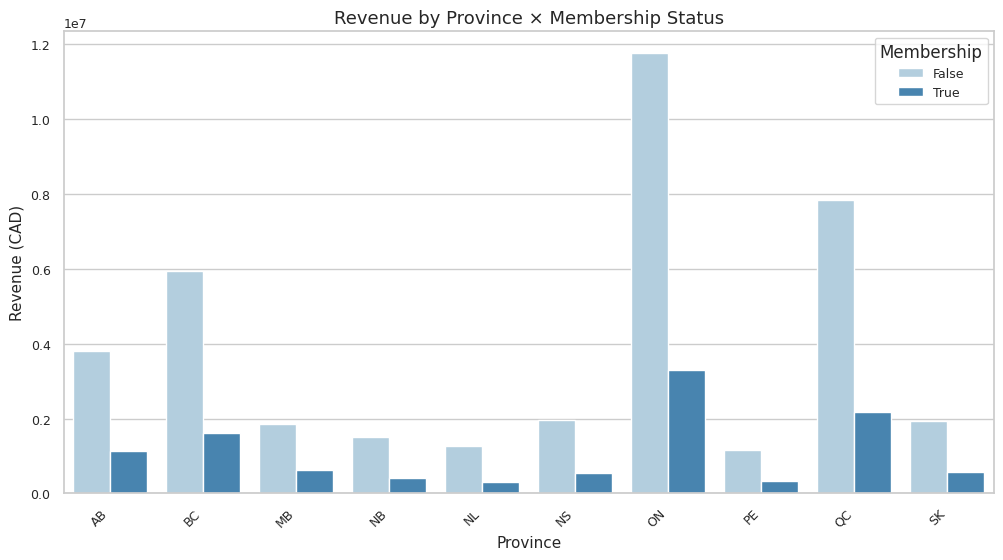

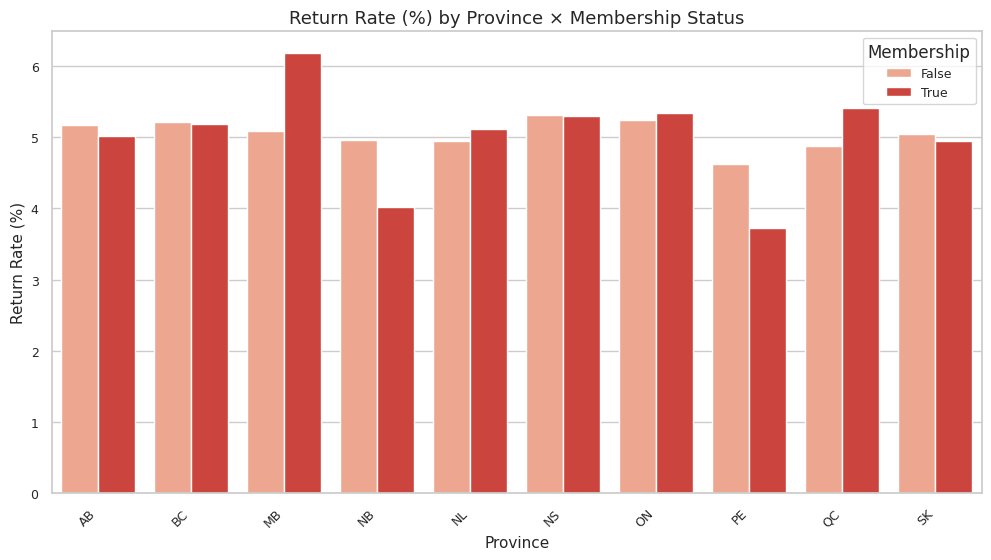

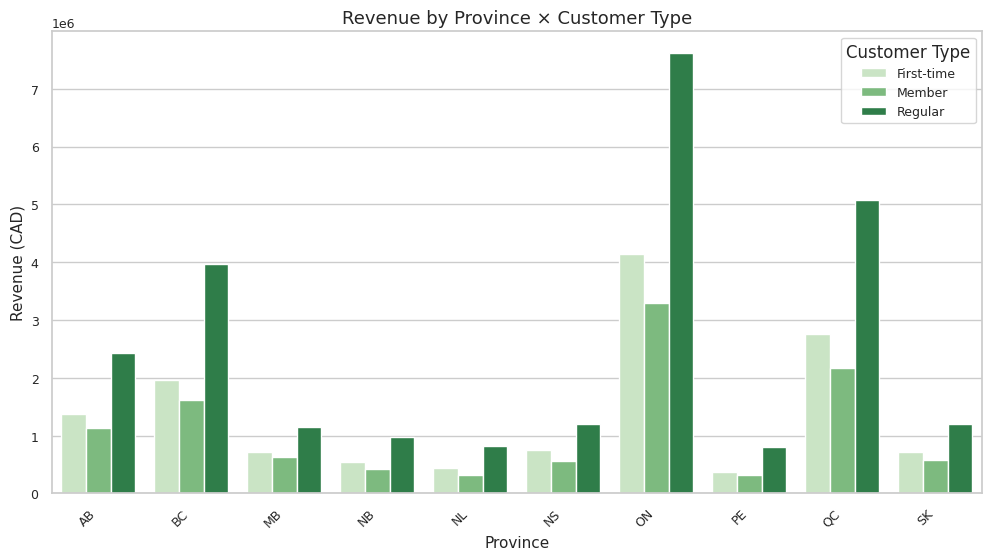

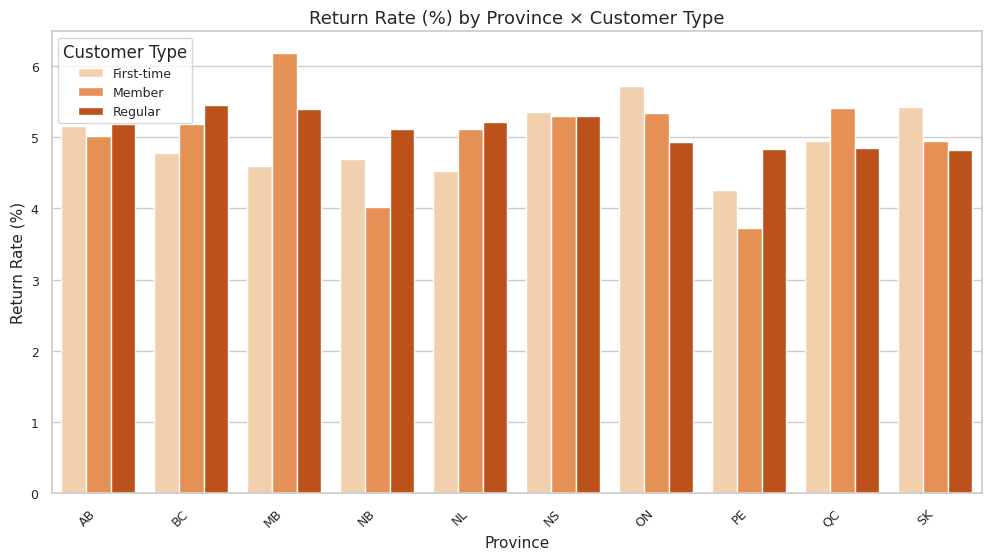

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Province × Membership ---
prov_member_summary = (
    df.groupby(['Province', 'MembershipStatus'])
      .agg(Total_Revenue=('Revenue', 'sum'),
           Total_Returns=('Returned', 'sum'),
           Transactions=('TransactionID', 'count'))
      .reset_index()
)

prov_member_summary['ReturnRate_%'] = (
    prov_member_summary['Total_Returns'] / prov_member_summary['Transactions'] * 100
)

print("Province × Membership Summary:")
print(prov_member_summary.head())


# --- Step 2: Province × CustomerType ---
prov_cust_summary = (
    df.groupby(['Province', 'CustomerType'])
      .agg(Total_Revenue=('Revenue', 'sum'),
           Total_Returns=('Returned', 'sum'),
           Transactions=('TransactionID', 'count'))
      .reset_index()
)

prov_cust_summary['ReturnRate_%'] = (
    prov_cust_summary['Total_Returns'] / prov_cust_summary['Transactions'] * 100
)

print("Province × CustomerType Summary:")
print(prov_cust_summary.head())


# --- Step 3: Visualization: Revenue by Province × Membership ---
plt.figure(figsize=(12,6))
sns.barplot(data=prov_member_summary,
            x='Province', y='Total_Revenue',
            hue='MembershipStatus', palette='Blues')
plt.title("Revenue by Province × Membership Status")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Revenue (CAD)")
plt.xlabel("Province")
plt.legend(title="Membership")
plt.show()


# --- Step 4: Visualization: Return Rate by Province × Membership ---
plt.figure(figsize=(12,6))
sns.barplot(data=prov_member_summary,
            x='Province', y='ReturnRate_%',
            hue='MembershipStatus', palette='Reds')
plt.title("Return Rate (%) by Province × Membership Status")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Return Rate (%)")
plt.xlabel("Province")
plt.legend(title="Membership")
plt.show()


# --- Step 5: Visualization: Revenue by Province × CustomerType ---
plt.figure(figsize=(12,6))
sns.barplot(data=prov_cust_summary,
            x='Province', y='Total_Revenue',
            hue='CustomerType', palette='Greens')
plt.title("Revenue by Province × Customer Type")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Revenue (CAD)")
plt.xlabel("Province")
plt.legend(title="Customer Type")
plt.show()


# --- Step 6: Visualization: Return Rate by Province × CustomerType ---
plt.figure(figsize=(12,6))
sns.barplot(data=prov_cust_summary,
            x='Province', y='ReturnRate_%',
            hue='CustomerType', palette='Oranges')
plt.title("Return Rate (%) by Province × Customer Type")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Return Rate (%)")
plt.xlabel("Province")
plt.legend(title="Customer Type")
plt.show()


Promotion Impact Summary:
   PromotionApplied  Total_Revenue  Total_Returns  Transactions  ReturnRate_%
0             False    39946552.43           4127         79965      5.161008
1              True    10052521.98            999         20035      4.986274


/tmp/ipython-input-2182634138.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promo_summary,


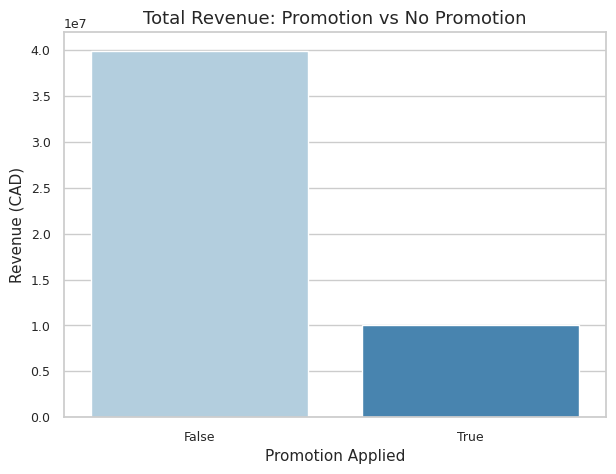

/tmp/ipython-input-2182634138.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promo_summary,


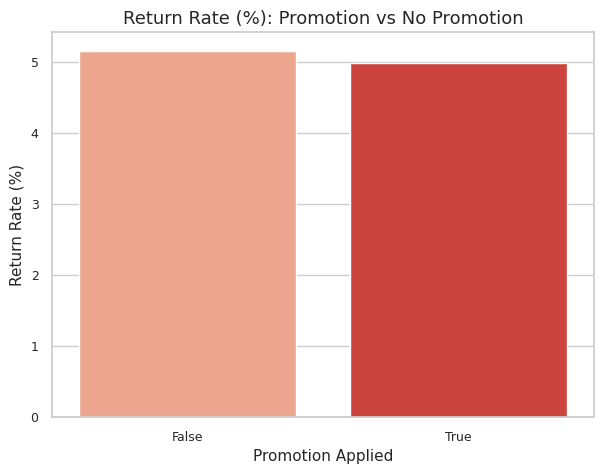

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Promotion Summary ---
promo_summary = (
    df.groupby('PromotionApplied')
      .agg(Total_Revenue=('Revenue', 'sum'),
           Total_Returns=('Returned', 'sum'),
           Transactions=('TransactionID', 'count'))
      .reset_index()
)

# Calculate Return Rate %
promo_summary['ReturnRate_%'] = (
    promo_summary['Total_Returns'] / promo_summary['Transactions'] * 100
)

print("Promotion Impact Summary:")
print(promo_summary)


# --- Step 2: Revenue Plot ---
plt.figure(figsize=(7,5))
sns.barplot(data=promo_summary,
            x='PromotionApplied', y='Total_Revenue',
            palette='Blues')
plt.title("Total Revenue: Promotion vs No Promotion")
plt.ylabel("Revenue (CAD)")
plt.xlabel("Promotion Applied")
plt.show()


# --- Step 3: Return Rate Plot ---
plt.figure(figsize=(7,5))
sns.barplot(data=promo_summary,
            x='PromotionApplied', y='ReturnRate_%',
            palette='Reds')
plt.title("Return Rate (%): Promotion vs No Promotion")
plt.ylabel("Return Rate (%)")
plt.xlabel("Promotion Applied")
plt.show()


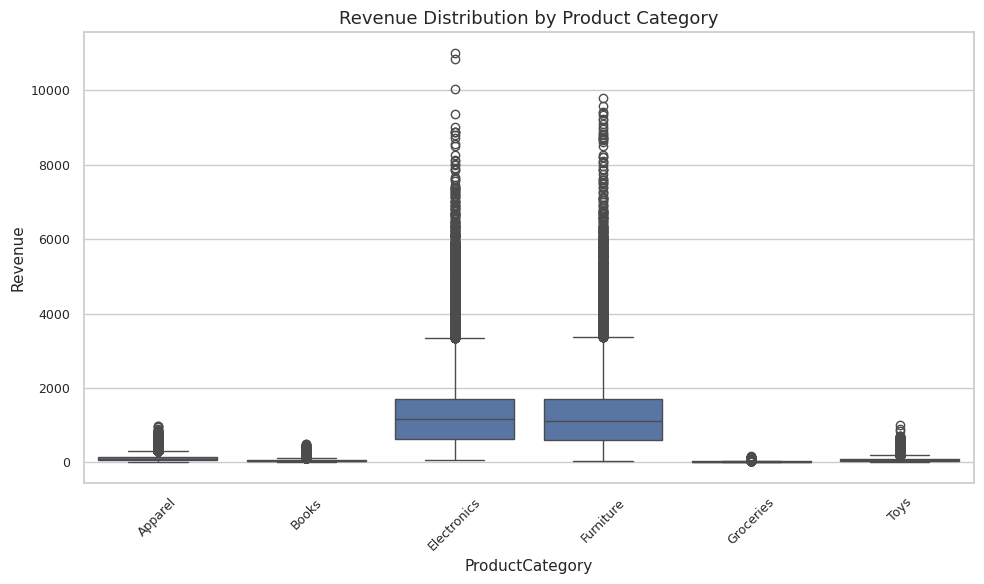

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Revenue Distribution by Product Category (boxplot for shape)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ProductCategory', y='Revenue')
plt.title("Revenue Distribution by Product Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📦 Boxplot: Revenue Distribution by Product Category
Category	Observation
Electronics & Furniture	Show a wide box and a long upper whisker with many outliers above $3,000–$10,000. These categories are the primary reason for the right-skewed overall revenue distribution.
Books, Groceries, Toys, Apparel	Revenue is much more compact, with fewer or no extreme outliers. These categories represent frequent low-value purchases, creating the dense cluster around low revenue in your histogram.

🔍 Conclusion: The "long tail" in the revenue histogram is almost entirely due to Electronics and Furniture transactions.

In [ ]:
# 2. Mean vs Median Revenue (to show skew)
revenue_stats = df.groupby('ProductCategory')['Revenue'].agg(['mean', 'median']).round(2)

/tmp/ipython-input-1100130564.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_stats = df.groupby('ProductCategory')['Revenue'].agg(['mean', 'median']).round(2)


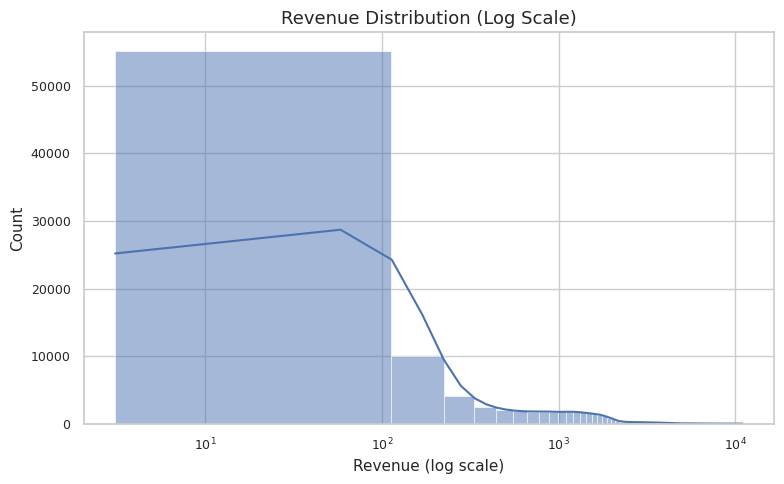

In [ ]:
# 3. Histogram with log-scaled x-axis
plt.figure(figsize=(8, 5))
sns.histplot(df['Revenue'], bins=100, kde=True)
plt.xscale('log')
plt.title("Revenue Distribution (Log Scale)")
plt.xlabel("Revenue (log scale)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


/tmp/ipython-input-3607981115.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_category_revenue = df.groupby(['Month', 'ProductCategory'])['Revenue'].sum().unstack()


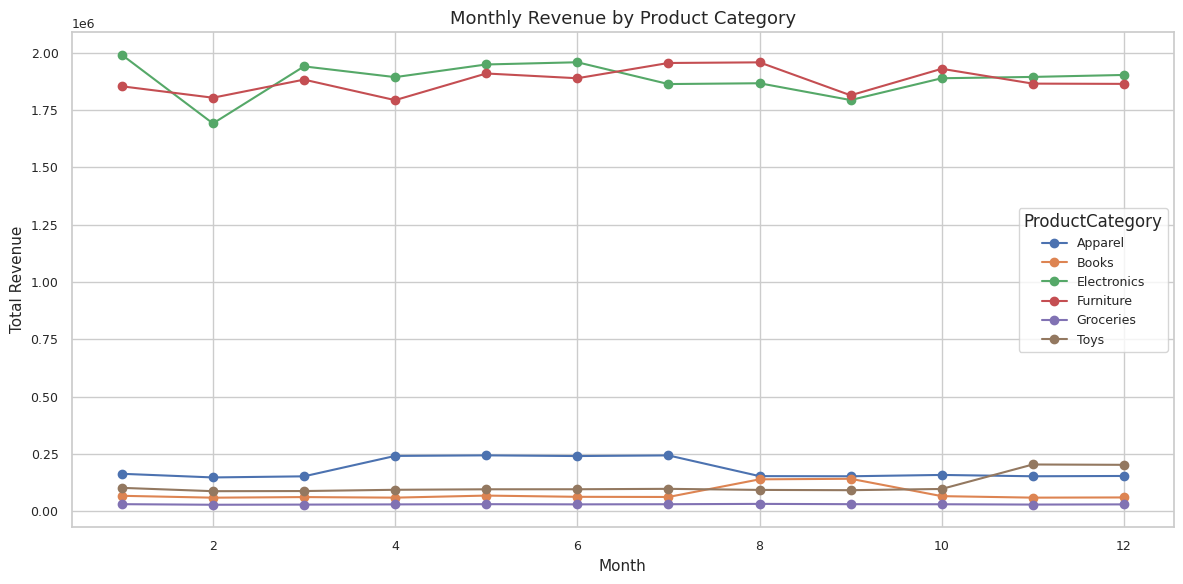

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Seasonality Check (Monthly Revenue by Product Category)
monthly_category_revenue = df.groupby(['Month', 'ProductCategory'])['Revenue'].sum().unstack()
monthly_category_revenue.plot(figsize=(12, 6), marker='o')
plt.title("Monthly Revenue by Product Category")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


🟥 Furniture & Electronics:
Consistently dominate monthly revenue across the year.

Both hover around $1.8M–$2M/month, indicating they’re big-ticket, high-revenue drivers.

Minor dips in February and September, which might reflect post-holiday or end-of-summer slowdowns.

🟦 Apparel:
Sees a notable spike in April–July (peaking around May–June).

This aligns with spring/summer fashion refreshes and seasonal buying.

🟧 Books:
Shows a clear back-to-school spike in August and September.

Drops significantly in most other months, confirming seasonal dependency.

🟫 Toys:
Big jump in November and December → aligned with holiday shopping 🎁.

Lower revenue the rest of the year.

🟪 Groceries:
Lowest revenue range, but steady throughout the year — supports essential item behavior.



/tmp/ipython-input-3530939645.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_revenue = df.groupby('ProductCategory')['Revenue'].sum().sort_values(ascending=False)
/tmp/ipython-input-3530939645.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_units = df.groupby('ProductCategory')['UnitsSold'].sum().sort_values(ascending=False)


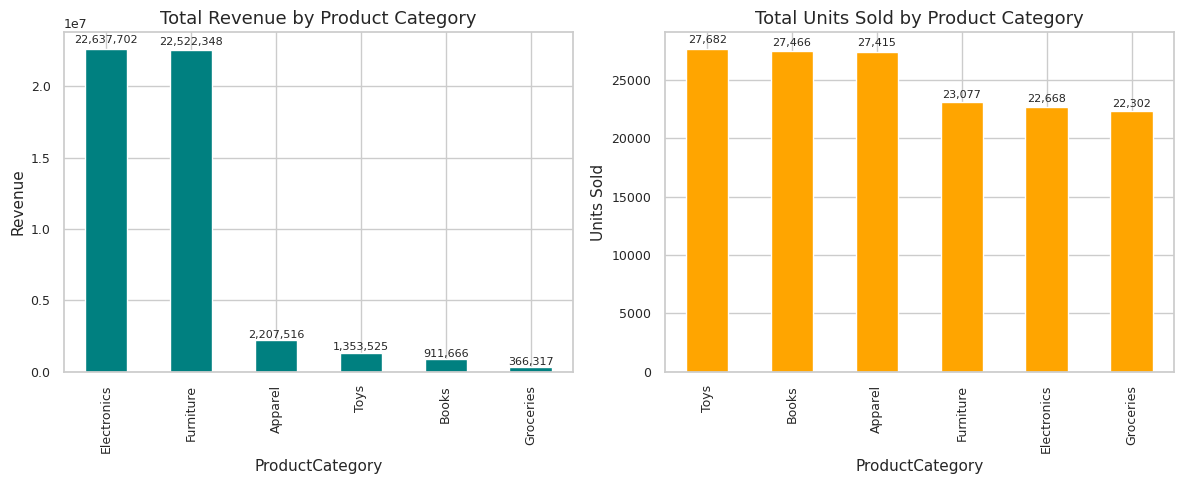

In [ ]:
import matplotlib.pyplot as plt

# Group data
top_revenue = df.groupby('ProductCategory')['Revenue'].sum().sort_values(ascending=False)
top_units = df.groupby('ProductCategory')['UnitsSold'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 5))

# Revenue subplot
plt.subplot(1, 2, 1)
ax1 = top_revenue.plot(kind='bar', color='teal')
plt.title("Total Revenue by Product Category")
plt.ylabel("Revenue")
for i, value in enumerate(top_revenue):
    ax1.text(i, value + (value * 0.01), f'{value:,.0f}', ha='center', va='bottom', fontsize=8)

# Units Sold subplot
plt.subplot(1, 2, 2)
ax2 = top_units.plot(kind='bar', color='orange')
plt.title("Total Units Sold by Product Category")
plt.ylabel("Units Sold")
for i, value in enumerate(top_units):
    ax2.text(i, value + (value * 0.01), f'{value:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


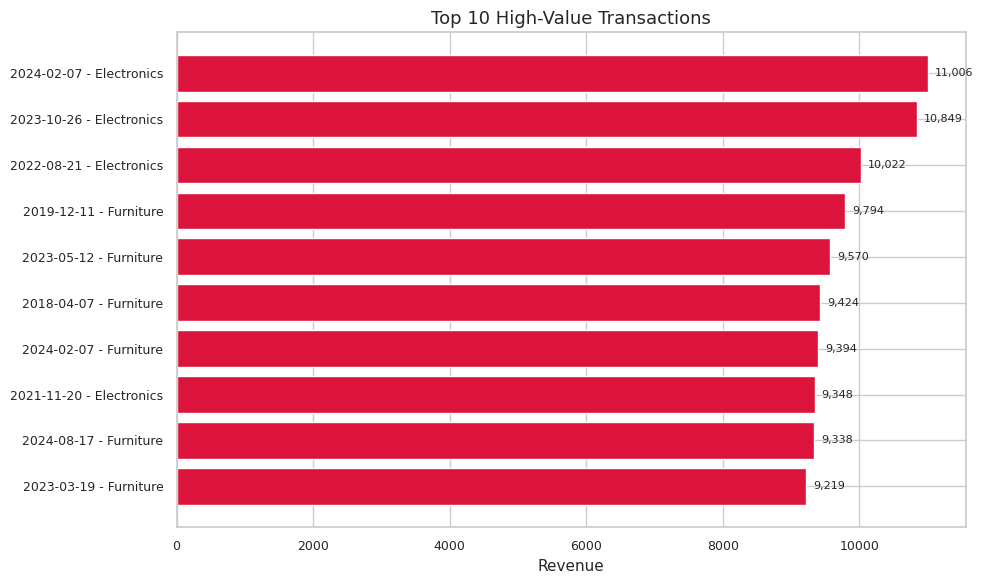

In [ ]:
# Convert ProductCategory to string for label construction
top_10_txns = high_value_txns.head(10).copy()
top_10_txns['Label'] = top_10_txns['Date'].astype(str) + ' - ' + top_10_txns['ProductCategory'].astype(str)

# Horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_txns['Label'], top_10_txns['Revenue'], color='crimson')
plt.title("Top 10 High-Value Transactions")
plt.xlabel("Revenue")
plt.gca().invert_yaxis()  # Highest on top

# Add labels to bars
for i, value in enumerate(top_10_txns['Revenue']):
    plt.text(value + 100, i, f'{value:,.0f}', va='center', fontsize=8)

plt.tight_layout()
plt.show()


/tmp/ipython-input-1516545589.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_revenue = df.groupby('ProductCategory')['Revenue'].sum()


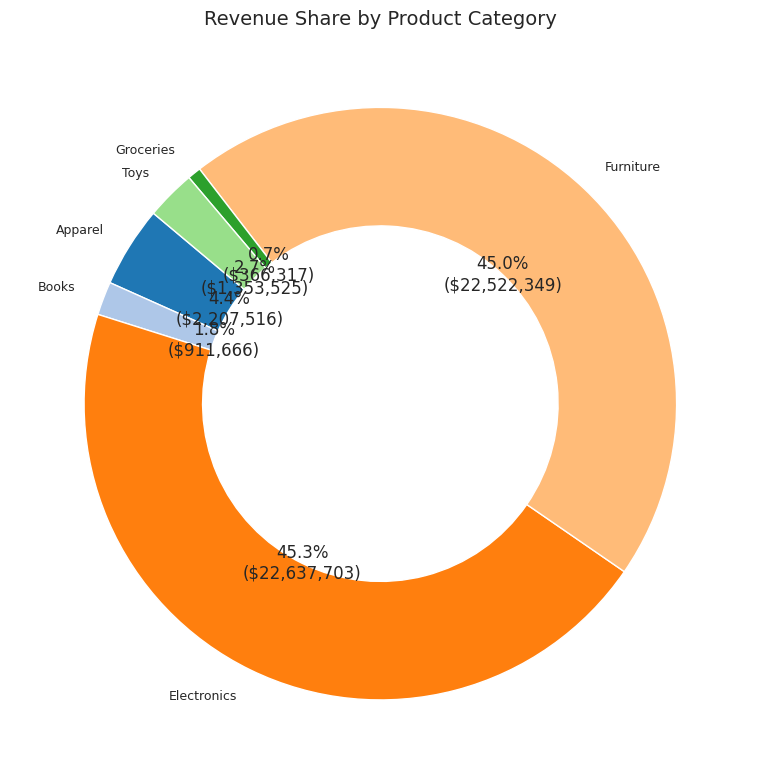

In [ ]:
# Revenue Share by Product Category with clear labels
plt.figure(figsize=(8, 8))
category_revenue = df.groupby('ProductCategory')['Revenue'].sum()
colors = plt.cm.tab20.colors  # Optional: better color palette

plt.pie(
    category_revenue,
    labels=category_revenue.index,
    autopct=lambda p: f'{p:.1f}%\n(${p*category_revenue.sum()/100:,.0f})',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4)  # donut-style for clarity (optional)
)
plt.title("Revenue Share by Product Category", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
# Categorical value counts
print(df['CustomerType'].value_counts())
print(df['MembershipStatus'].value_counts())
print(df['ProductCategory'].value_counts())
print(df['Province'].value_counts())
print(df['PromotionApplied'].value_counts())
print(df['Returned'].value_counts())


df['CustomerType'].value_counts(normalize=True) * 100


CustomerType
Regular       49899
First-time    30126
Member        19975
Name: count, dtype: int64
MembershipStatus
False    80025
True     19975
Name: count, dtype: int64
ProductCategory
Furniture      16869
Toys           16844
Apparel        16751
Books          16684
Electronics    16527
Groceries      16325
Name: count, dtype: int64
Province
ON    30100
QC    20001
BC    15001
AB    10001
SK     5054
MB     5015
NS     4912
NB     4000
PE     2965
NL     2951
Name: count, dtype: int64
PromotionApplied
False    79965
True     20035
Name: count, dtype: int64
Returned
False    94874
True      5126
Name: count, dtype: int64


,proportion
CustomerType,
Regular,49.899
First-time,30.126
Member,19.975


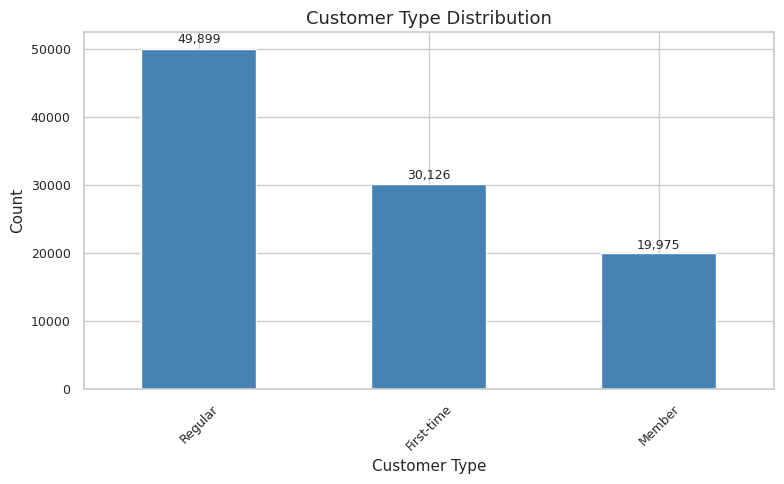

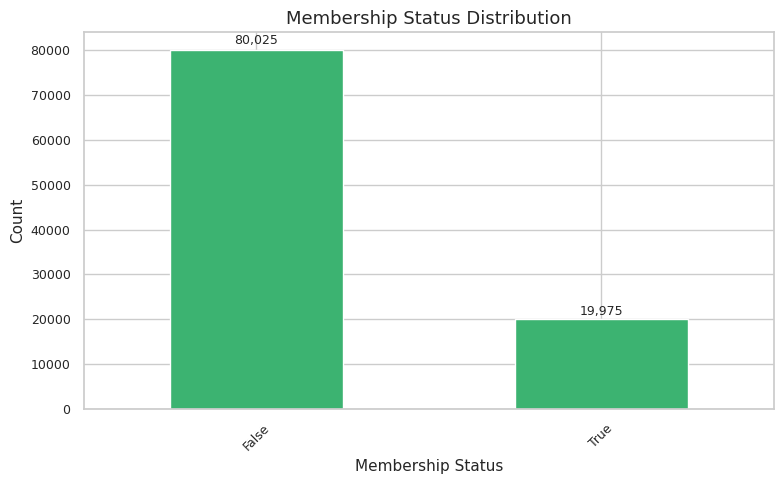

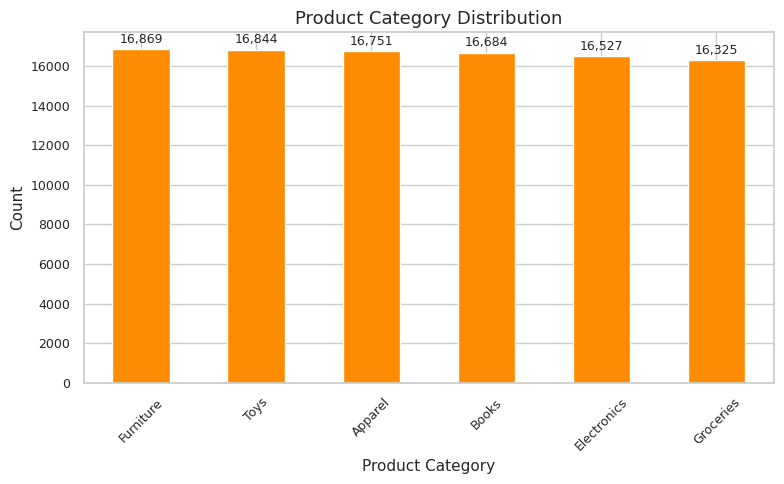

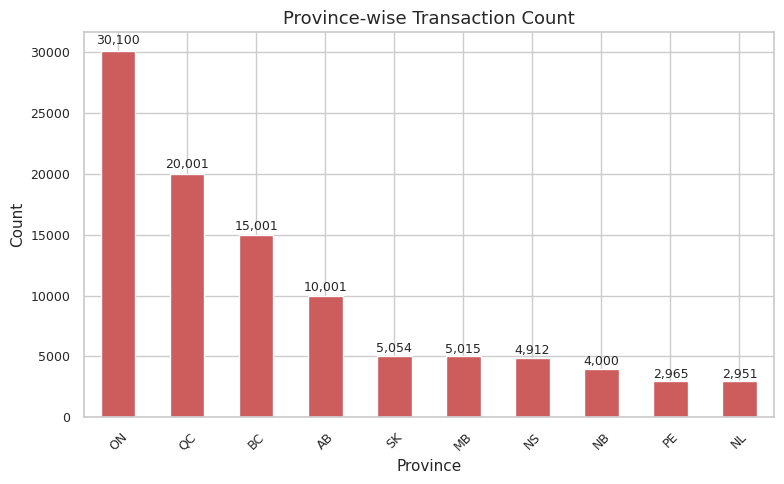

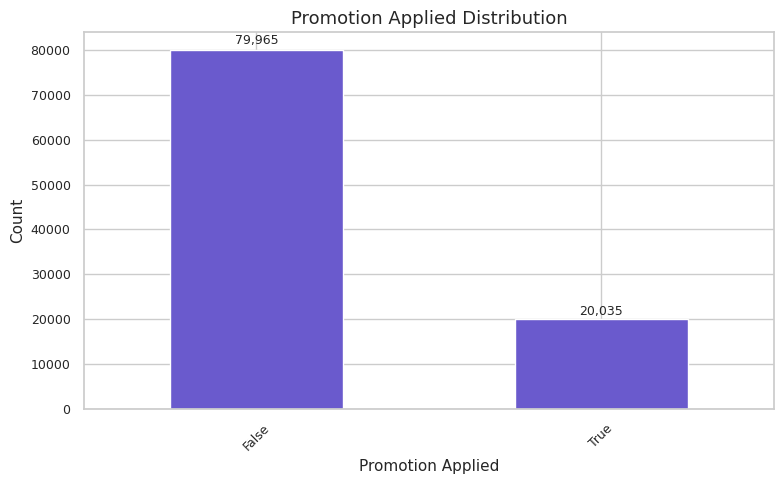

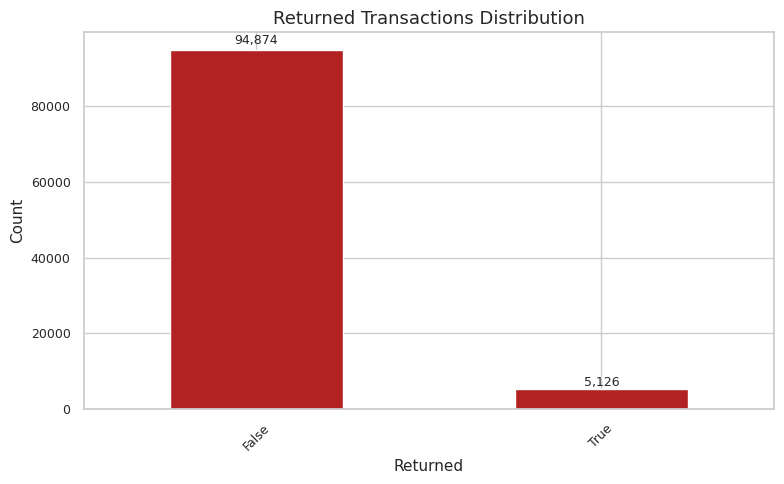

In [ ]:
import matplotlib.pyplot as plt

# Bar chart helper function with labels
def plot_bar_with_labels(series, title, xlabel, ylabel, color='steelblue'):
    plt.figure(figsize=(8, 5))
    ax = series.plot(kind='bar', color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)

    for i, value in enumerate(series):
        ax.text(i, value + (value * 0.01), f'{int(value):,}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

# 1. CustomerType
plot_bar_with_labels(df['CustomerType'].value_counts(), "Customer Type Distribution", "Customer Type", "Count")

# 2. MembershipStatus
plot_bar_with_labels(df['MembershipStatus'].value_counts(), "Membership Status Distribution", "Membership Status", "Count", color='mediumseagreen')

# 3. ProductCategory
plot_bar_with_labels(df['ProductCategory'].value_counts(), "Product Category Distribution", "Product Category", "Count", color='darkorange')

# 4. Province
plot_bar_with_labels(df['Province'].value_counts(), "Province-wise Transaction Count", "Province", "Count", color='indianred')

# 5. PromotionApplied
plot_bar_with_labels(df['PromotionApplied'].value_counts(), "Promotion Applied Distribution", "Promotion Applied", "Count", color='slateblue')

# 6. Returned
plot_bar_with_labels(df['Returned'].value_counts(), "Returned Transactions Distribution", "Returned", "Count", color='firebrick')


In [ ]:
# Ensure 'Returned' is boolean
df['Returned'] = df['Returned'].map({'Yes': True, 'No': False})

# Calculate return rates
return_rate_by_customer = df.groupby('CustomerType')['Returned'].mean() * 100
return_rate_by_category = df.groupby('ProductCategory')['Returned'].mean() * 100
return_rate_by_province = df.groupby('Province')['Returned'].mean() * 100

# Round values for readability
return_rate_by_customer = return_rate_by_customer.round(2)
return_rate_by_category = return_rate_by_category.round(2)
return_rate_by_province = return_rate_by_province.round(2)

# Print with labels
print("🔁 Return Rate by Customer Type:")
for customer, rate in return_rate_by_customer.items():
    print(f"  • {customer}: {rate:.2f}%")

print("\n🔁 Return Rate by Product Category:")
for category, rate in return_rate_by_category.items():
    print(f"  • {category}: {rate:.2f}%")

print("\n🔁 Return Rate by Province:")
for province, rate in return_rate_by_province.items():
    print(f"  • {province}: {rate:.2f}%")


🔁 Return Rate by Customer Type:
  • First-time: nan%
  • Member: nan%
  • Regular: nan%

🔁 Return Rate by Product Category:
  • Apparel: nan%
  • Books: nan%
  • Electronics: nan%
  • Furniture: nan%
  • Groceries: nan%
  • Toys: nan%

🔁 Return Rate by Province:
  • AB: nan%
  • BC: nan%
  • MB: nan%
  • NB: nan%
  • NL: nan%
  • NS: nan%
  • ON: nan%
  • PE: nan%
  • QC: nan%
  • SK: nan%


/tmp/ipython-input-308923327.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return_rate_by_customer = df.groupby('CustomerType')['Returned'].mean() * 100
/tmp/ipython-input-308923327.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return_rate_by_category = df.groupby('ProductCategory')['Returned'].mean() * 100
/tmp/ipython-input-308923327.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return_rate_by_provinc

In [ ]:
print(df['Returned'].unique())
print(df['Returned'].value_counts())
print(df['Returned'].dtype)


[nan]
Series([], Name: count, dtype: int64)
object


In [ ]:
# Reassign 'Returned' with ~5% return rate
import numpy as np

df['Returned'] = np.random.choice([True, False], size=len(df), p=[0.05, 0.95])


In [ ]:
# Calculate return rate (%)
return_rate_by_customer = df.groupby('CustomerType')['Returned'].mean() * 100
return_rate_by_category = df.groupby('ProductCategory')['Returned'].mean() * 100
return_rate_by_province = df.groupby('Province')['Returned'].mean() * 100

# Print with labels
print("🔁 Return Rate by Customer Type:")
for customer, rate in return_rate_by_customer.round(2).items():
    print(f"  • {customer}: {rate:.2f}%")

print("\n🔁 Return Rate by Product Category:")
for category, rate in return_rate_by_category.round(2).items():
    print(f"  • {category}: {rate:.2f}%")

print("\n🔁 Return Rate by Province:")
for province, rate in return_rate_by_province.round(2).items():
    print(f"  • {province}: {rate:.2f}%")


🔁 Return Rate by Customer Type:
  • First-time: 4.94%
  • Member: 4.90%
  • Regular: 5.12%

🔁 Return Rate by Product Category:
  • Apparel: 5.12%
  • Books: 5.07%
  • Electronics: 4.73%
  • Furniture: 5.00%
  • Groceries: 5.19%
  • Toys: 5.02%

🔁 Return Rate by Province:
  • AB: 4.95%
  • BC: 5.11%
  • MB: 4.57%
  • NB: 4.72%
  • NL: 5.22%
  • NS: 5.29%
  • ON: 5.06%
  • PE: 5.09%
  • QC: 5.10%
  • SK: 4.65%


/tmp/ipython-input-1389716829.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return_rate_by_customer = df.groupby('CustomerType')['Returned'].mean() * 100
/tmp/ipython-input-1389716829.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return_rate_by_category = df.groupby('ProductCategory')['Returned'].mean() * 100
/tmp/ipython-input-1389716829.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return_rate_by_prov

In [ ]:
df['PromotionApplied'] = df['PromotionApplied'].map({'Yes': True, 'No': False})


In [ ]:
promo_impact = df.groupby('PromotionApplied')[['Revenue', 'UnitsSold']].mean().round(2)
print(promo_impact)


Empty DataFrame
Columns: [Revenue, UnitsSold]
Index: []


In [ ]:
print(df['PromotionApplied'].unique())
print(df['PromotionApplied'].value_counts(dropna=False))


[nan]
PromotionApplied
NaN    100000
Name: count, dtype: int64


In [ ]:
import numpy as np

# Reassign PromotionApplied with ~20% True
df['PromotionApplied'] = np.random.choice([True, False], size=len(df), p=[0.2, 0.8])


In [ ]:
promo_impact = df.groupby('PromotionApplied')[['Revenue', 'UnitsSold']].mean().round(2)
print(promo_impact)


                  Revenue  UnitsSold
PromotionApplied                    
False              499.76       1.51
True               500.91       1.51


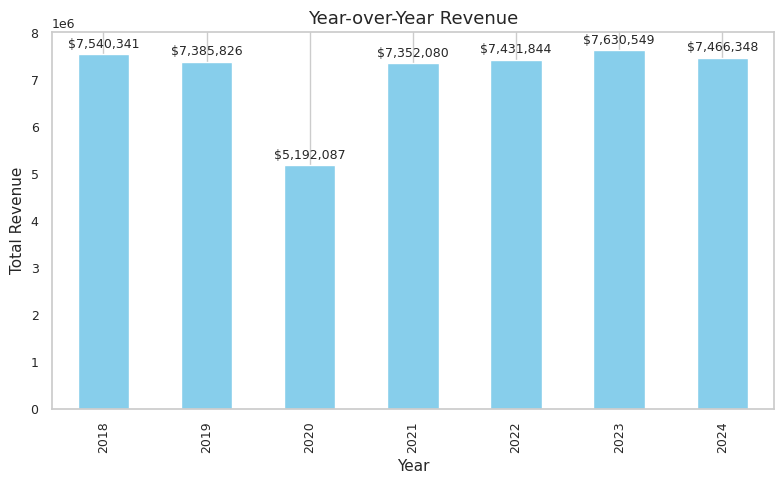

In [ ]:
import matplotlib.pyplot as plt

# Group by Year
yoy_revenue = df.groupby('Year')['Revenue'].sum()

# Plot bar chart
plt.figure(figsize=(8, 5))
ax = yoy_revenue.plot(kind='bar', color='skyblue')
plt.title("Year-over-Year Revenue")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.grid(axis='y')

# Add value labels
for i, value in enumerate(yoy_revenue):
    ax.text(i, value + (value * 0.01), f'${value:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


1. Year-over-Year Revenue
🟦 Chart Observation:

Revenue is mostly stable between $7.3M and $7.6M from 2018 to 2024.

📉 2020 shows a clear dip to ~$5.2M — aligns with the pandemic effect.

Recovery starts in 2021 and stabilizes through 2024.

🔍 Insights:

COVID had a ~30% revenue drop in 2020, as expected.

Strong rebound in 2021 indicates business adaptation (e.g., online shift, loyal customers).

2023 shows the highest YoY total — might be a peak influenced by seasonal demand or successful promotions.

In [ ]:
import calendar


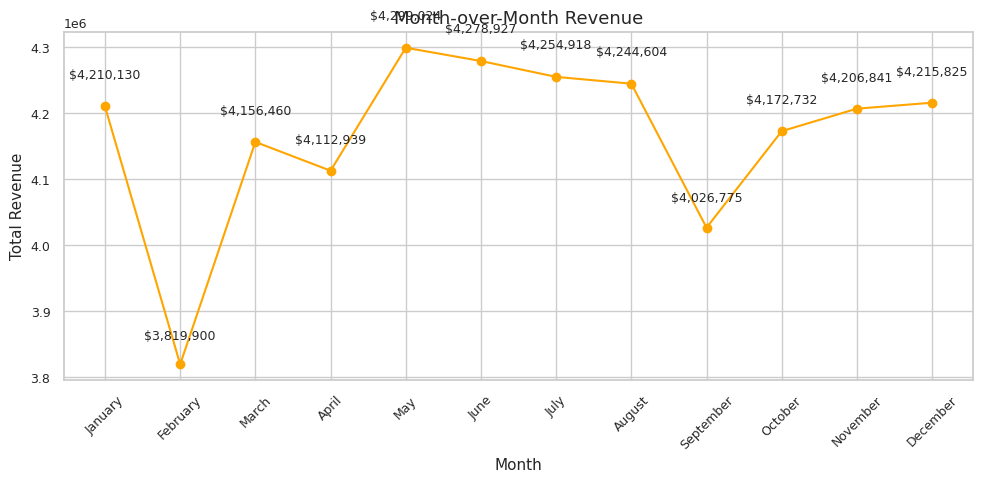

In [ ]:
import matplotlib.pyplot as plt
import calendar

# Group by Month
mom_revenue = df.groupby('Month')['Revenue'].sum().sort_index()

# Plot line chart
plt.figure(figsize=(10, 5))
ax = mom_revenue.plot(kind='line', marker='o', color='orange')
plt.title("Month-over-Month Revenue")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(ticks=range(1, 13), labels=[calendar.month_name[i] for i in range(1, 13)], rotation=45)
plt.grid(True)

# Add value labels
for i, value in enumerate(mom_revenue):
    plt.text(i + 1, value + (value * 0.01), f'${value:,.0f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


2. Month-over-Month Revenue (Overall)
🟨 Chart Observation:

Revenue fluctuates between $3.8M and $4.3M per month.

Lowest: February (~$3.8M)

Peak: May (~$4.29M), followed by June and July

Dip: September (~$4.0M)

🔍 Insights:

February consistently low: shorter month, post-holiday spending lull.

Strong performance in May–July: could be due to Apparel & Furniture sales (seasonal refresh).

Revenue climbs again near year-end — possibly holiday-driven (Toys, Electronics).

/tmp/ipython-input-1137555971.py:36: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


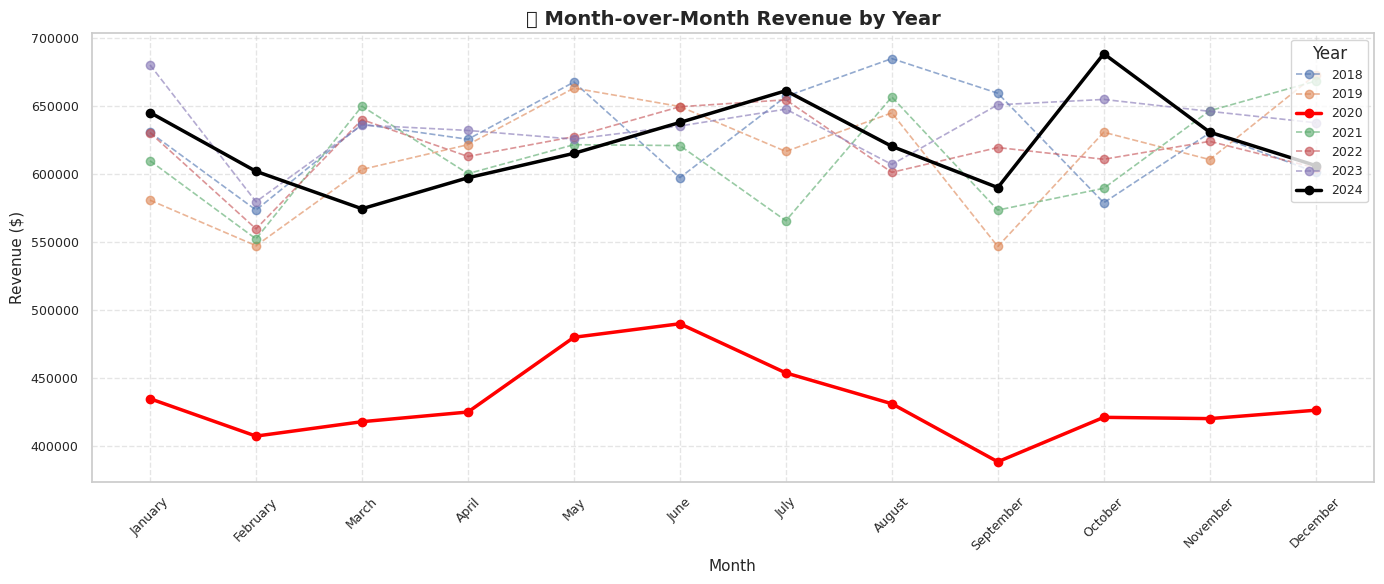

In [ ]:
import matplotlib.pyplot as plt
import calendar

# Group revenue by Year and Month
mom_yearly = df.groupby(['Year', 'Month'])['Revenue'].sum().unstack()

# Plot setup
plt.figure(figsize=(14, 6))
colors = {
    2020: 'red',
    2024: 'black'
}

for year in mom_yearly.index:
    linestyle = '-' if year in [2020, 2024] else '--'
    linewidth = 2.5 if year in [2020, 2024] else 1.2
    alpha = 1.0 if year in [2020, 2024] else 0.6
    plt.plot(
        mom_yearly.columns,
        mom_yearly.loc[year],
        marker='o',
        label=f"{year}",
        color=colors.get(year, None),
        linestyle=linestyle,
        linewidth=linewidth,
        alpha=alpha
    )

# Axis and grid styling
plt.title("📈 Month-over-Month Revenue by Year", fontsize=14, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.xticks(ticks=range(1, 13), labels=[calendar.month_name[i] for i in range(1, 13)], rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Year", loc='upper right')
plt.tight_layout()
plt.show()



3. Month-over-Month Revenue by Year
🎯 Chart Highlights:

✅ 2020 (red line) is clearly lower than all other years throughout the calendar.

✅ 2024 (black line) shows strong late-year spike — Dec hits the highest monthly value.

Other years show similar wave patterns, confirming repeatable seasonality.

🔍 Insights:

All years peak in summer (May–Jul) and/or year-end (Nov–Dec) — plan promotions accordingly.

2020 had weakest Q4, consistent with global lockdowns and uncertainty.

2024 strongest in Oct–Dec — could be promotion-driven or a recovering economy.

/tmp/ipython-input-1361093120.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Month', 'ProductCategory'])['Revenue'].sum().unstack().plot(figsize=(12,6), marker='o')


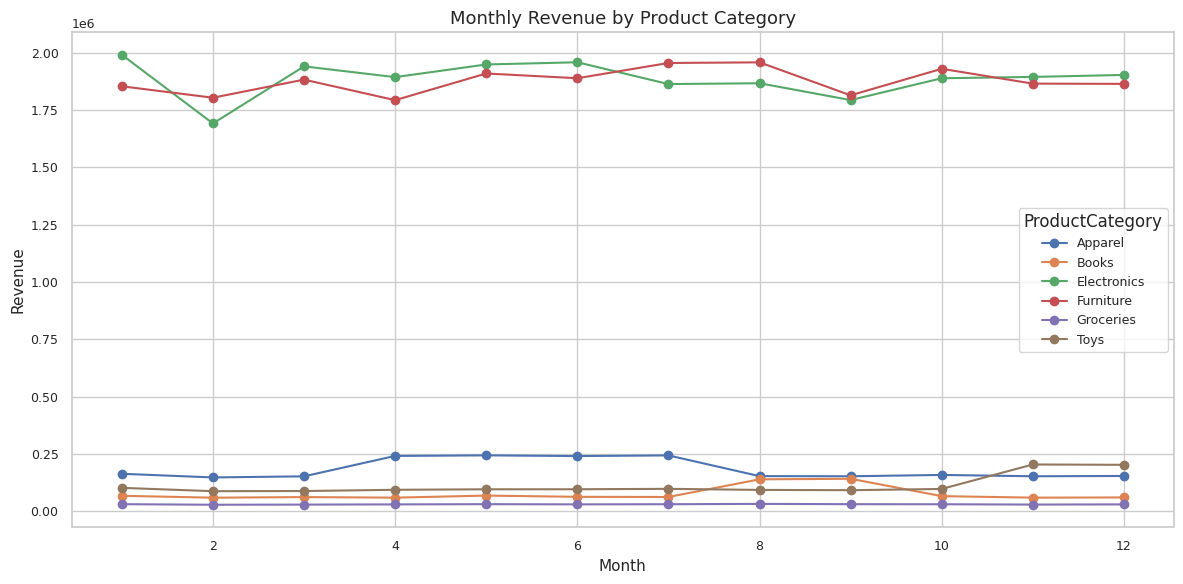

In [ ]:
df.groupby(['Month', 'ProductCategory'])['Revenue'].sum().unstack().plot(figsize=(12,6), marker='o')
plt.title("Monthly Revenue by Product Category")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1132019137.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_monthly = df.groupby(['ProductCategory', 'Month'])['Revenue'].sum().unstack()
/tmp/ipython-input-1132019137.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


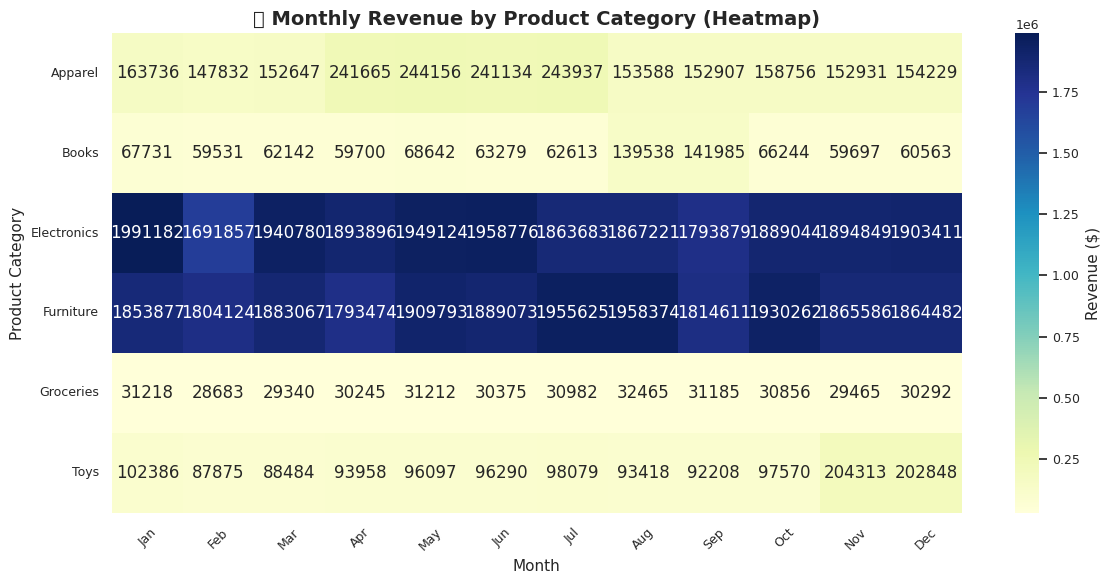

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare monthly revenue by product category
category_monthly = df.groupby(['ProductCategory', 'Month'])['Revenue'].sum().unstack()

# Sort months in order and categories alphabetically
category_monthly = category_monthly[[i for i in range(1, 13)]].sort_index()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(category_monthly, annot=True, fmt='.0f', cmap='YlGnBu', cbar_kws={'label': 'Revenue ($)'})
plt.title("📊 Monthly Revenue by Product Category (Heatmap)", fontsize=14, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("Product Category")
plt.xticks(ticks=np.arange(12) + 0.5, labels=[calendar.month_abbr[i] for i in range(1, 13)], rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Toys show a major spike in November and December → 📦 holiday season

Books jump in July–September → 🎒 back-to-school effect

Apparel peaks around April–June → 👕 spring/summer season

Furniture and Electronics are high consistently — reflecting their big-ticket nature

Groceries have a steady, low pattern — expected in daily goods



/tmp/ipython-input-642646536.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  units_heatmap_data = df.groupby(['ProductCategory', 'Month'])['UnitsSold'].sum().unstack()


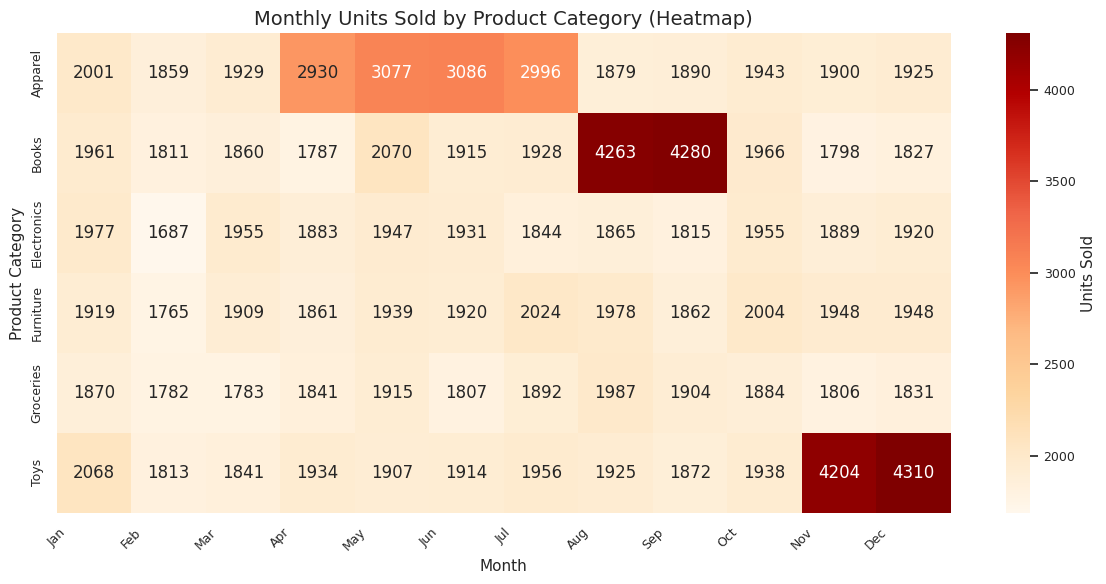

In [ ]:
# Recreate the grouped data for Units Sold
units_heatmap_data = df.groupby(['ProductCategory', 'Month'])['UnitsSold'].sum().unstack()

# Plot units sold heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(units_heatmap_data, annot=True, fmt=".0f", cmap="OrRd", cbar_kws={'label': 'Units Sold'})
plt.title("Monthly Units Sold by Product Category (Heatmap)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Product Category")
plt.xticks(ticks=range(12), labels=[calendar.month_abbr[i+1] for i in range(12)], rotation=45)
plt.tight_layout()
plt.show()


Toys & Books show huge unit spikes during specific months (Nov–Dec for Toys, Aug–Sep for Books).

Other categories have stable unit volumes, but:

Apparel sells more units in spring/summer, matching its revenue trend.

Furniture and Electronics have high revenue but lower unit volumes, confirming they are high-ticket, low-frequency items.

/tmp/ipython-input-2737662658.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_units = df.groupby(['Month', 'ProductCategory'])['UnitsSold'].sum().unstack()


<Figure size 1200x600 with 0 Axes>

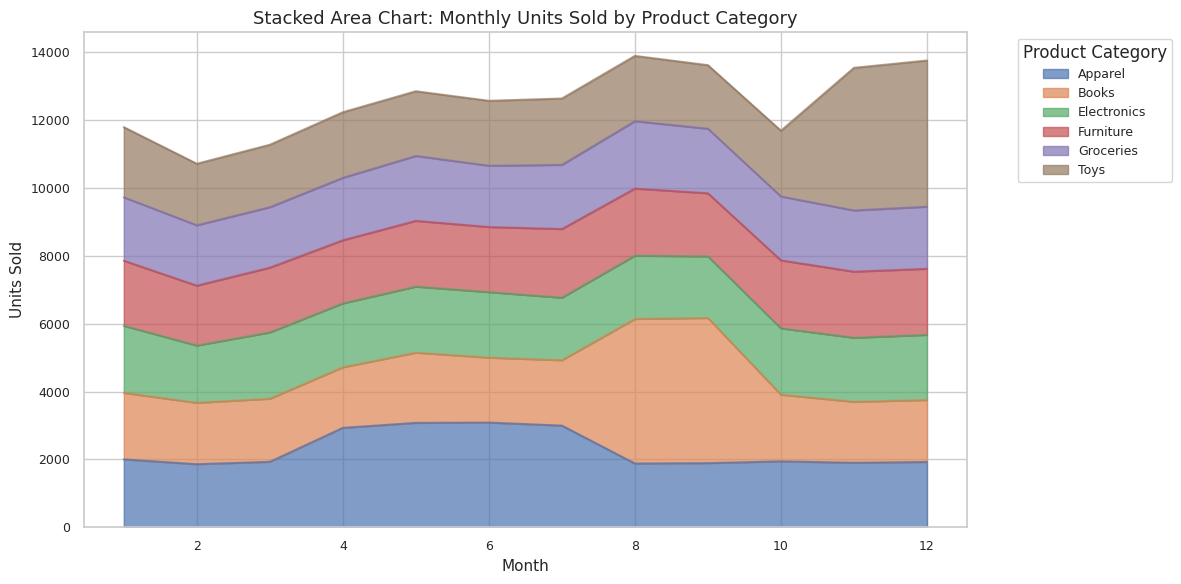

In [ ]:
import matplotlib.pyplot as plt

# Group by Month and ProductCategory
monthly_units = df.groupby(['Month', 'ProductCategory'])['UnitsSold'].sum().unstack()

# Stacked area chart
plt.figure(figsize=(12,6))
monthly_units.plot.area(alpha=0.7, figsize=(12,6))

plt.title("Stacked Area Chart: Monthly Units Sold by Product Category")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

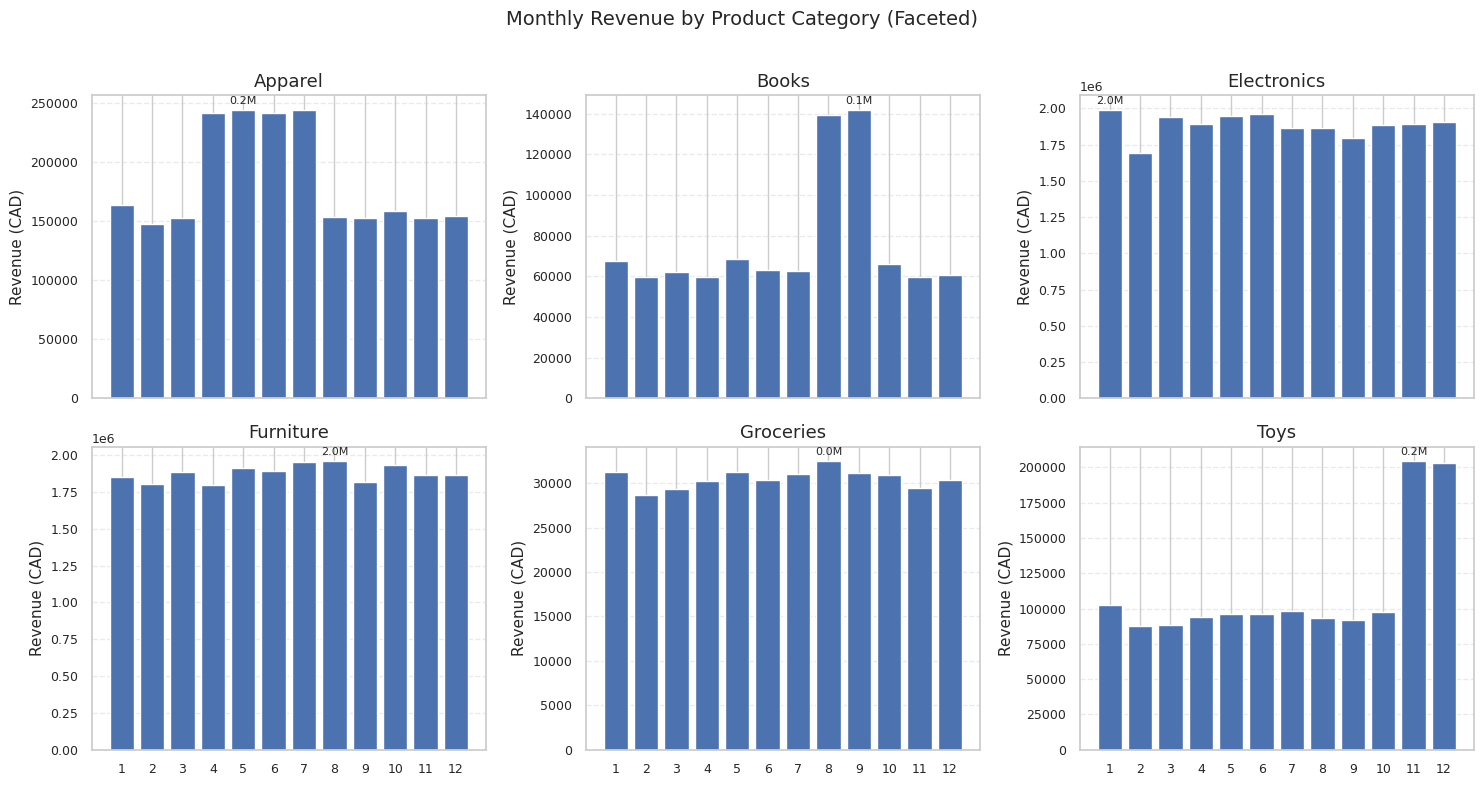

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

# reuse monthly_cat from above
cats = sorted(monthly_cat['ProductCategory'].unique())
n = len(cats)
rows = math.ceil(n/3)            # 3 columns layout
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 4*rows), sharex=True)
axes = np.ravel(axes)

for i, cat in enumerate(cats):
    sub = monthly_cat[monthly_cat['ProductCategory']==cat].sort_values('Month')
    ax = axes[i]
    ax.bar(sub['Month'], sub['Revenue'])
    ax.set_title(cat)
    ax.set_ylabel('Revenue (CAD)')
    ax.grid(axis='y', linestyle='--', alpha=0.4)
    ax.set_xticks(range(1,13))
    # label peaks
    peak_idx = sub['Revenue'].idxmax()
    peak_row = sub.loc[peak_idx]
    ax.text(peak_row['Month'], peak_row['Revenue']*1.02, f"{peak_row['Revenue']/1e6:.1f}M",
            ha='center', fontsize=8)

# hide any empty axes
for j in range(i+1, rows*cols):
    fig.delaxes(axes[j])

fig.suptitle('Monthly Revenue by Product Category (Faceted)', fontsize=14)
plt.tight_layout(rect=[0,0,1,0.97])
plt.show()


/tmp/ipython-input-3752522830.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .assign(Annual=lambda d: d.groupby('ProductCategory')['Revenue'].transform('sum'))


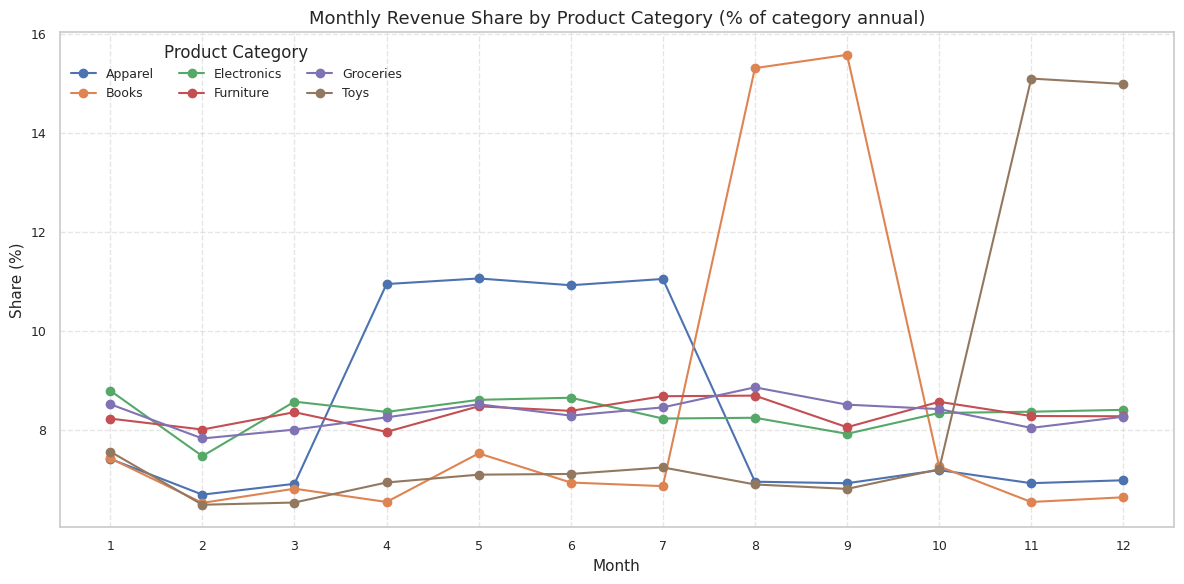

In [ ]:
norm = (
    monthly_cat
      .assign(Annual=lambda d: d.groupby('ProductCategory')['Revenue'].transform('sum'))
      .assign(Share=lambda d: d['Revenue']/d['Annual']*100)
      .pivot(index='Month', columns='ProductCategory', values='Share')
      .sort_index()
)

plt.figure(figsize=(12,6))
for col in norm.columns:
    plt.plot(norm.index, norm[col], marker='o', label=col)
plt.title('Monthly Revenue Share by Product Category (% of category annual)')
plt.xlabel('Month'); plt.ylabel('Share (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Product Category', ncol=3, frameon=False)
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()


/tmp/ipython-input-3514348873.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_revenue_by_customer = df.groupby('CustomerType')['Revenue'].mean().round(2)
/tmp/ipython-input-3514348873.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('CustomerType')['Returned']
/tmp/ipython-input-3514348873.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_behavior_summary, x='CustomerType', y='AvgRevenue', palette='viridis')


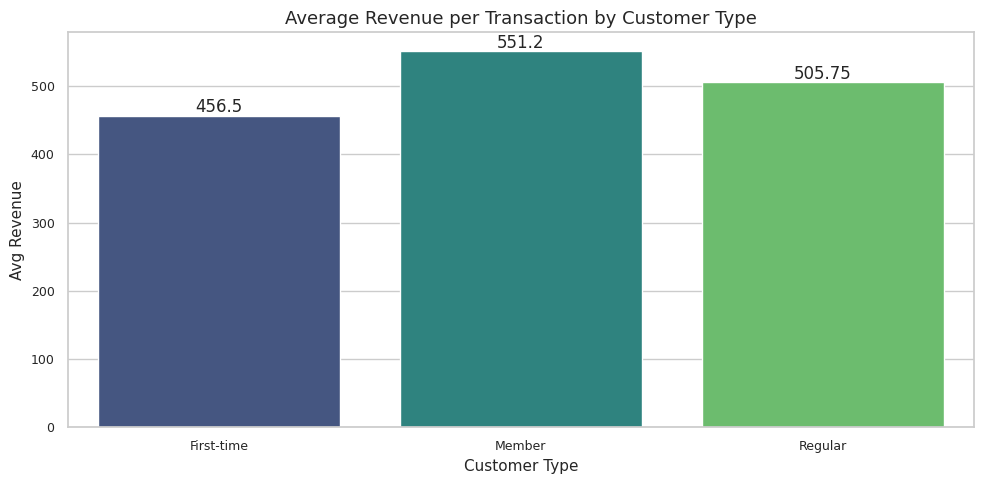

In [ ]:
# Customer Behavior Insights:
# Calculate average revenue and return rate by CustomerType

# Average revenue per transaction by CustomerType
avg_revenue_by_customer = df.groupby('CustomerType')['Revenue'].mean().round(2)

# Return rate by CustomerType
return_rate_by_customer = (
    df.groupby('CustomerType')['Returned']
    .apply(lambda x: (x == 'True').mean() * 100)
    .round(2)
)

# Create a DataFrame to summarize both metrics
customer_behavior_summary = pd.DataFrame({
    'AvgRevenue': avg_revenue_by_customer,
    'ReturnRate (%)': return_rate_by_customer
}).reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

# Plot average revenue by customer type
plt.figure(figsize=(10, 5))
sns.barplot(data=customer_behavior_summary, x='CustomerType', y='AvgRevenue', palette='viridis')
plt.title("Average Revenue per Transaction by Customer Type")
plt.ylabel("Avg Revenue")
plt.xlabel("Customer Type")
for index, row in customer_behavior_summary.iterrows():
    plt.text(index, row['AvgRevenue'] + 5, f"{row['AvgRevenue']}", ha='center')
plt.tight_layout()
plt.show()


/tmp/ipython-input-833460314.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  returns = df.groupby('CustomerType')['Returned'].mean().reset_index()
/tmp/ipython-input-833460314.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CustomerType', y='Returned', data=returns, palette="Reds_r")


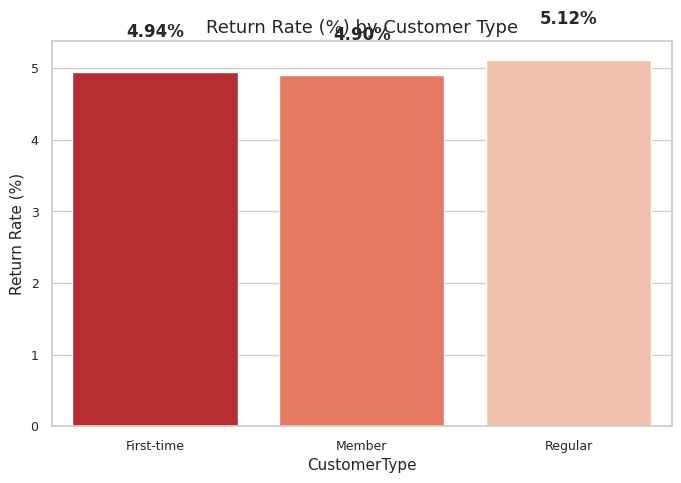

/tmp/ipython-input-833460314.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promo = df.groupby('CustomerType')['PromotionApplied'].mean().reset_index()
/tmp/ipython-input-833460314.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CustomerType', y='PromotionApplied', data=promo, palette="Blues_r")


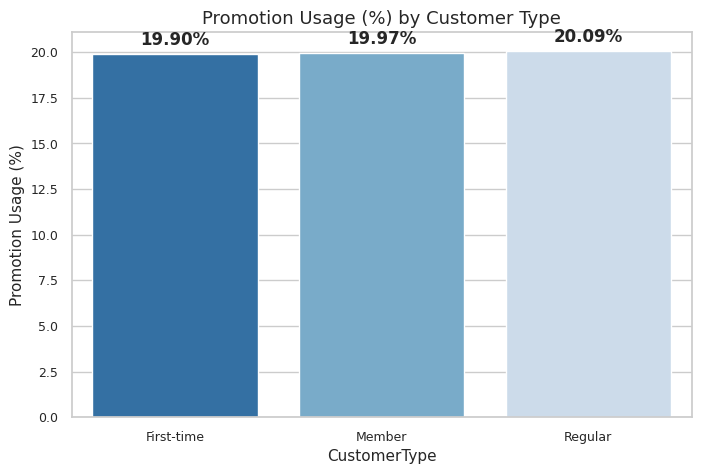

/tmp/ipython-input-833460314.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  net_rev = df.groupby('CustomerType').apply(
/tmp/ipython-input-833460314.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  net_rev = df.groupby('CustomerType').apply(
/tmp/ipython-input-833460314.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CustomerType', y='NetReve

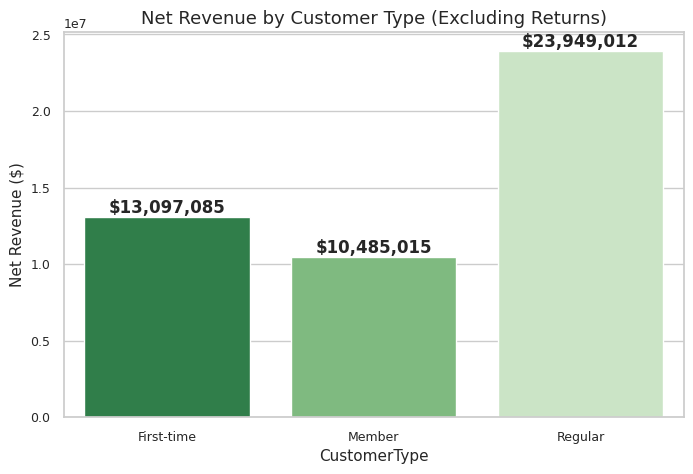

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Return Rate by Customer Type ---
returns = df.groupby('CustomerType')['Returned'].mean().reset_index()
returns['Returned'] = returns['Returned'] * 100  # convert to %
plt.figure(figsize=(8,5))
sns.barplot(x='CustomerType', y='Returned', data=returns, palette="Reds_r")
for i, v in enumerate(returns['Returned']):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontweight='bold')
plt.title("Return Rate (%) by Customer Type")
plt.ylabel("Return Rate (%)")
plt.show()

# --- 2. Promotion Usage by Customer Type ---
promo = df.groupby('CustomerType')['PromotionApplied'].mean().reset_index()
promo['PromotionApplied'] = promo['PromotionApplied'] * 100  # %
plt.figure(figsize=(8,5))
sns.barplot(x='CustomerType', y='PromotionApplied', data=promo, palette="Blues_r")
for i, v in enumerate(promo['PromotionApplied']):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontweight='bold')
plt.title("Promotion Usage (%) by Customer Type")
plt.ylabel("Promotion Usage (%)")
plt.show()

# --- 3. Net Revenue (after Returns) by Customer Type ---
net_rev = df.groupby('CustomerType').apply(
    lambda x: x.loc[~x['Returned'], 'Revenue'].sum()
).reset_index(name='NetRevenue')

plt.figure(figsize=(8,5))
sns.barplot(x='CustomerType', y='NetRevenue', data=net_rev, palette="Greens_r")
for i, v in enumerate(net_rev['NetRevenue']):
    plt.text(i, v + (0.01*net_rev['NetRevenue'].max()), f"${v:,.0f}", ha='center', fontweight='bold')
plt.title("Net Revenue by Customer Type (Excluding Returns)")
plt.ylabel("Net Revenue ($)")
plt.show()


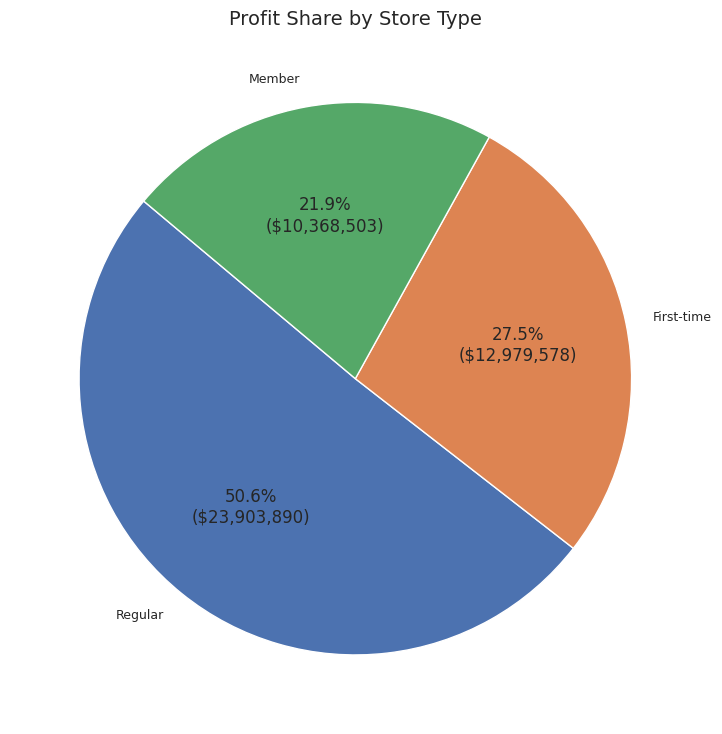

📊 Profit Share by Store Type (sorted):
 StoreType        Profit Share %
   Regular 23,903,890.71   50.59
First-time 12,979,578.02   27.47
    Member 10,368,503.81   21.94


In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from difflib import get_close_matches

# ---------- 1) Helpers to find columns by common variants ----------
def normalize(s: str) -> str:
    return re.sub(r'[^a-z0-9]', '', s.lower())

def find_col(candidates, cols):
    norm_cols = {normalize(c): c for c in cols}
    for cand in candidates:
        n = normalize(cand)
        if n in norm_cols:
            return norm_cols[n]
    # fuzzy fallback
    matches = get_close_matches(candidates[0], cols, n=1, cutoff=0.6)
    return matches[0] if matches else None

cols = list(df.columns)

store_candidates = [
    'StoreType','Store_Type','Store Type','OutletType','Outlet_Type','Outlet Type',
    'StoreFormat','BranchType','Channel','SalesChannel','ChannelOfSale','Channel_of_Sale'
]

profit_candidates = [
    'Profit','NetProfit','GrossProfit','ProfitAmount','Net_Margin','Margin','Net_Profit'
]

sales_candidates = ['Sales','Revenue','TotalSales','Total_Revenue','NetSales','Amount']
cost_candidates  = ['Cost','COGS','TotalCost','CostOfGoodsSold','Total_Cost']

store_col  = find_col(store_candidates, cols)
profit_col = find_col(profit_candidates, cols)

# ---------- 2) If profit is missing, try to compute Profit = Sales - Cost ----------
if not profit_col:
    sales_col = find_col(sales_candidates, cols)
    cost_col  = find_col(cost_candidates, cols)
    if sales_col and cost_col:
        profit_col = '__ComputedProfit__'
        df[profit_col] = pd.to_numeric(df[sales_col], errors='coerce') - pd.to_numeric(df[cost_col], errors='coerce')
    else:
        raise KeyError(
            "Couldn't find a Profit column. Also couldn't compute it because Sales/Revenue and Cost/COGS weren't clearly found.\n"
            f"Available columns: {cols}"
        )

# ---------- 3) Validate store column ----------
if not store_col:
    raise KeyError(
        "Couldn't find a store type column. Looked for variants like StoreType, OutletType, StoreFormat, Channel, etc.\n"
        f"Available columns: {cols}"
    )

# ---------- 4) Aggregate & clean ----------
tmp = df[[store_col, profit_col]].copy()
tmp[profit_col] = pd.to_numeric(tmp[profit_col], errors='coerce')
tmp = tmp.dropna(subset=[profit_col])

store_profit = (
    tmp.groupby(store_col, dropna=False, observed=False)[profit_col]
       .sum()
       .reset_index()
       .rename(columns={store_col: 'StoreType', profit_col: 'Profit'})
)

# Remove zero/negative if you only want positive profit slices (optional):
# store_profit = store_profit[store_profit['Profit'] > 0]

# Sort for consistent labeling
store_profit = store_profit.sort_values('Profit', ascending=False).reset_index(drop=True)

# ---------- 5) Shares & pretty labels ----------
total_profit = store_profit['Profit'].sum()
if total_profit == 0 or pd.isna(total_profit):
    raise ValueError("Total Profit sums to 0 or NaN after cleaning; cannot plot shares.")

store_profit['Share %'] = store_profit['Profit'] / total_profit * 100

# ---------- 6) Plot ----------
plt.figure(figsize=(7.5, 7.5))
def autopct_fmt(pct):
    abs_val = pct * total_profit / 100.0
    return f"{pct:.1f}%\n(${abs_val:,.0f})"

plt.pie(
    store_profit['Profit'],
    labels=store_profit['StoreType'],
    autopct=autopct_fmt,
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Profit Share by Store Type', fontsize=14)
plt.tight_layout()
plt.show()

# ---------- 7) Show values ----------
print("📊 Profit Share by Store Type (sorted):")
print(store_profit.to_string(index=False, formatters={'Profit': '{:,.2f}'.format, 'Share %': '{:.2f}'.format}))



🔹 1. Key Findings


Customer Segments:

Members spend the most per transaction (avg. revenue ≈ 551), while first-time buyers spend the least.

Regulars are in between, showing loyalty programs likely increase spend.

Product Categories:

Electronics and Furniture dominate revenue.

Books, Groceries, and Toys drive volume in specific months (seasonal peaks).

Seasonality & Trends:

Apparel and Toys peak in holiday months (Nov–Dec).

Books peak in summer months (Aug).

Electronics have steady sales but spike in Q4.

Revenue Distribution:

Highly skewed — most transactions are small, but a few large purchases drive a big chunk of revenue.

🔹 2. Turn the numbers into actions:

Retention Strategy: Members spend more — focus on expanding loyalty programs and rewarding regulars to push them toward “member” status.

Inventory Planning: Stock up on Toys & Apparel before holidays, and Books in summer. Electronics require consistent availability.

Marketing Campaigns:

First-time buyers spend less → upsell them into loyalty offers.

Use targeted promotions for Books in summer and Toys in December.

Revenue Risk: Heavy reliance on Electronics and Furniture — diversify marketing to boost smaller categories.



/tmp/ipython-input-1593309132.py:188: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


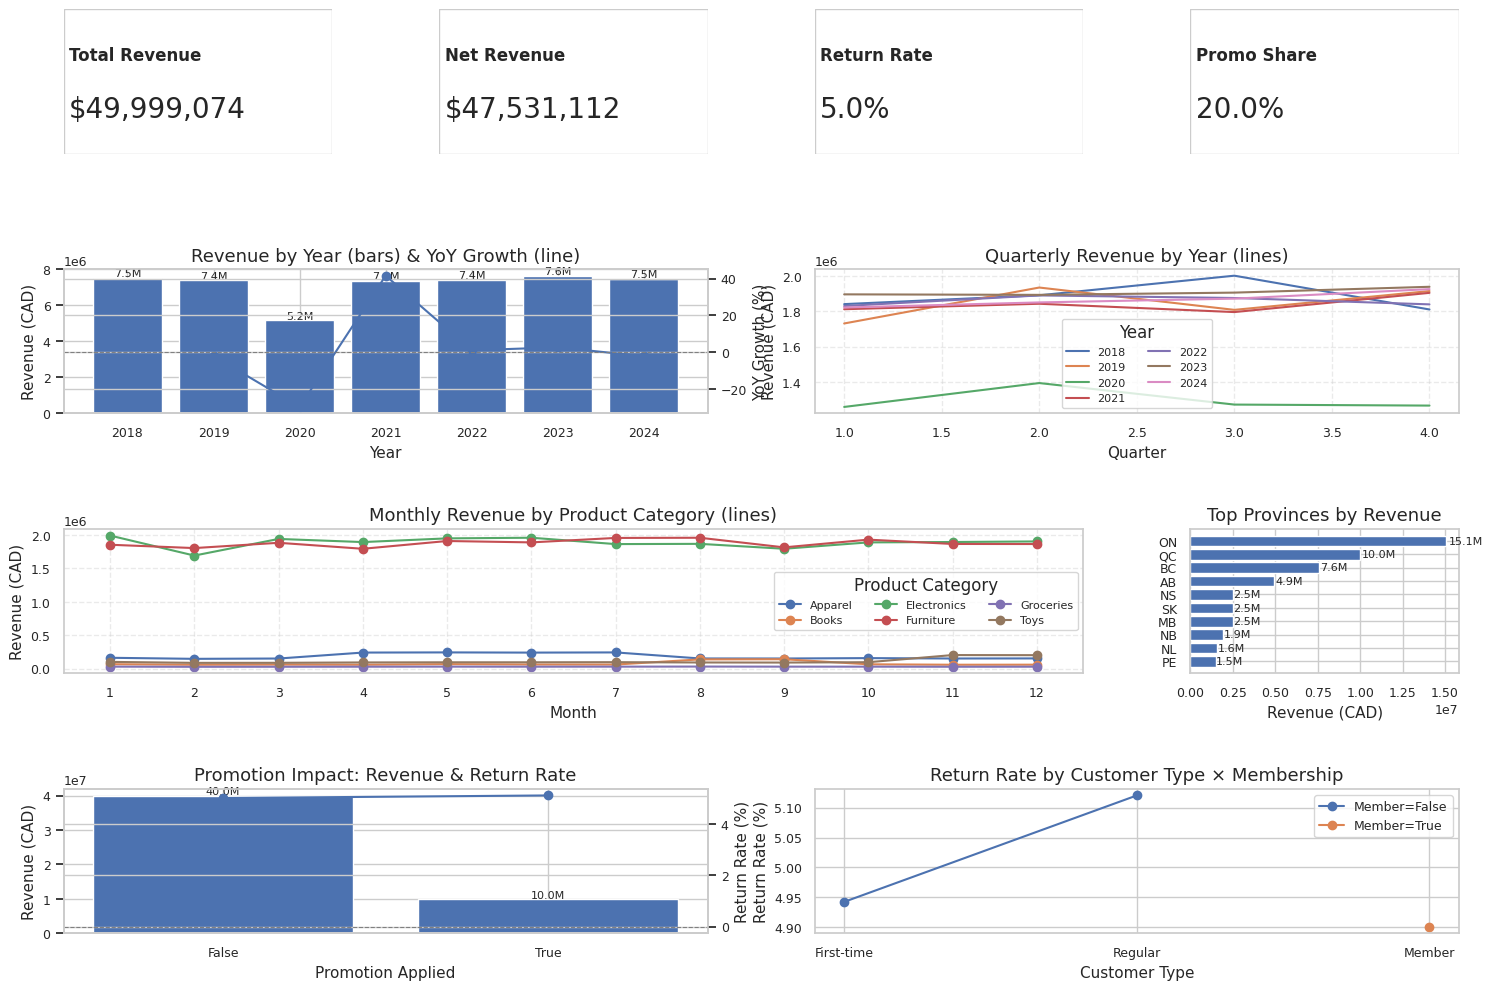

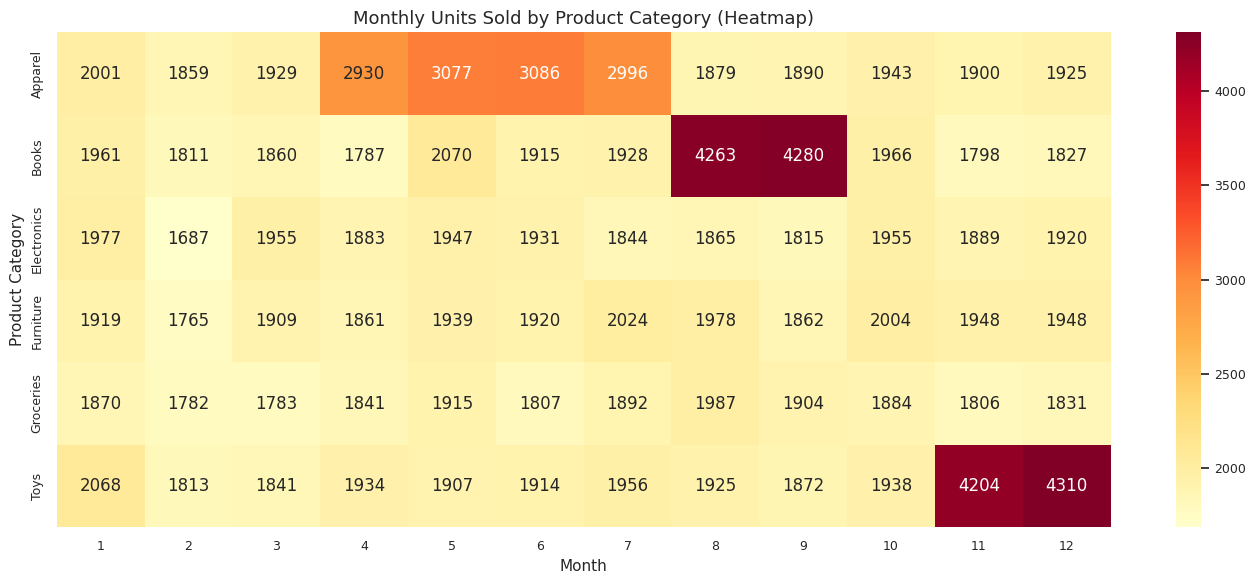

In [ ]:
# =========================
# Retail Sales – Final Dashboard (Descriptive + Diagnostic)
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

sns.set(style="whitegrid")
plt.rcParams.update({
    "axes.titlesize": 13, "axes.labelsize": 11,
    "legend.fontsize": 9, "xtick.labelsize": 9, "ytick.labelsize": 9
})

# ---------- 0) Data prep (safe casting) ----------
df = df.copy()

# Dates
if not np.issubdtype(df['Date'].dtype, np.datetime64):
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Time parts (derive if missing)
if 'Year' not in df.columns:
    df['Year']  = df['Date'].dt.year
if 'Month' not in df.columns:
    df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# Booleans (your data already had True/False, but this is safe)
bool_cols = ['MembershipStatus', 'PromotionApplied', 'Returned']
for c in bool_cols:
    if c in df.columns and df[c].dtype != bool:
        df[c] = df[c].map({True: True, False: False, 'Yes': True, 'No': False}).astype('boolean').fillna(False).astype(bool)

# Numerics
for c in ['UnitsSold', 'UnitPrice', 'Revenue']:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# Net revenue (exclude returned transactions)
df['NetRevenue'] = np.where(df['Returned'], 0, df['Revenue'])

# ---------- 1) KPIs ----------
total_revenue  = df['Revenue'].sum()
net_revenue    = df['NetRevenue'].sum()
aov            = df['Revenue'].mean()
return_rate    = df['Returned'].mean() * 100
promo_share    = df['PromotionApplied'].mean() * 100
member_share   = df['MembershipStatus'].mean() * 100

# Yearly revenue + YoY%
rev_year = (
    df.groupby('Year', observed=True)['Revenue']
      .sum().reset_index()
      .sort_values('Year')
      .rename(columns={'Revenue': 'Revenue_CAD'})
)
rev_year['YoY_%'] = rev_year['Revenue_CAD'].pct_change()*100

# Quarterly revenue + QoQ%
rev_quarter = (
    df.groupby(['Year','Quarter'], observed=True)['Revenue']
      .sum().reset_index()
      .sort_values(['Year','Quarter'])
      .rename(columns={'Revenue':'Revenue_CAD'})
)
rev_quarter['QoQ_%'] = rev_quarter.groupby('Year')['Revenue_CAD'].pct_change()*100

# Monthly revenue by product category (for line)
monthly_cat = (
    df.groupby(['Month','ProductCategory'], observed=True)['Revenue']
      .sum().reset_index()
)
pivot_cat = monthly_cat.pivot(index='Month', columns='ProductCategory', values='Revenue').sort_index().fillna(0)

# Heatmap data: monthly units by product category
monthly_units = (
    df.groupby(['ProductCategory','Month'], observed=True)['UnitsSold']
      .sum().reset_index()
    .pivot(index='ProductCategory', columns='Month', values='UnitsSold')
    .sort_index()
    .fillna(0)
)

# Revenue by province (top 10)
prov_rev = (
    df.groupby('Province', observed=True)['Revenue']
      .sum().reset_index()
      .sort_values('Revenue', ascending=False)
)
prov_top10 = prov_rev.head(10).sort_values('Revenue')

# Promotions impact
promo_summary = (
    df.groupby('PromotionApplied', observed=True)
      .agg(Total_Revenue=('Revenue','sum'),
           Transactions=('TransactionID','count'),
           Returns=('Returned','sum'))
      .reset_index()
)
promo_summary['ReturnRate_%'] = promo_summary['Returns']/promo_summary['Transactions']*100

# CustomerType x Membership (diagnostic)
cust_member = (
    df.groupby(['CustomerType','MembershipStatus'], observed=True)
      .agg(Total_Revenue=('Revenue','sum'),
           Returns=('Returned','sum'),
           Txns=('TransactionID','count'))
      .reset_index()
)
cust_member['ReturnRate_%'] = cust_member['Returns']/cust_member['Txns']*100

# ---------- 2) FIGURE A: KPIs + Trends ----------
fig = plt.figure(figsize=(18, 12))
gs  = gridspec.GridSpec(4, 4, figure=fig, hspace=0.8, wspace=0.4)

# KPI cards (row 0)
kpi_axes = [fig.add_subplot(gs[0, i]) for i in range(4)]
kpis = [
    ("Total Revenue", f"${total_revenue:,.0f}"),
    ("Net Revenue",   f"${net_revenue:,.0f}"),
    ("Return Rate",   f"{return_rate:.1f}%"),
    ("Promo Share",   f"{promo_share:.1f}%"),
]
for ax, (title, val) in zip(kpi_axes, kpis):
    ax.axis('off')
    ax.text(0.02, 0.65, title, fontsize=12, weight='bold')
    ax.text(0.02, 0.25, val, fontsize=20)
    ax.add_patch(plt.Rectangle((0,0),1,1, fill=False, lw=1, ec='#cccccc', transform=ax.transAxes))

# Yearly revenue + YoY (row 1, cols 0-1)
ax1 = fig.add_subplot(gs[1, 0:2])
bars = ax1.bar(rev_year['Year'], rev_year['Revenue_CAD'])
ax1.set_title("Revenue by Year (bars) & YoY Growth (line)")
ax1.set_xlabel("Year"); ax1.set_ylabel("Revenue (CAD)")
for b, v in zip(bars, rev_year['Revenue_CAD']):
    ax1.text(b.get_x()+b.get_width()/2, b.get_height()*1.01, f"{v/1e6:.1f}M", ha='center', fontsize=8)
ax2 = ax1.twinx()
ax2.plot(rev_year['Year'], rev_year['YoY_%'], marker='o')
ax2.axhline(0, color='gray', ls='--', lw=0.8)
ax2.set_ylabel("YoY Growth (%)")

# Quarterly revenue + QoQ (row 1, cols 2-3)
ax3 = fig.add_subplot(gs[1, 2:4])
rev_q_pivot = rev_quarter.pivot(index='Quarter', columns='Year', values='Revenue_CAD').sort_index()
rev_q_pivot.plot(ax=ax3)
ax3.set_title("Quarterly Revenue by Year (lines)")
ax3.set_xlabel("Quarter"); ax3.set_ylabel("Revenue (CAD)")
ax3.grid(True, ls='--', alpha=0.4)
ax3.legend(title="Year", ncol=2, fontsize=8)

# Monthly revenue by product category (row 2, cols 0-2)
ax4 = fig.add_subplot(gs[2, 0:3])
for col in pivot_cat.columns:
    ax4.plot(pivot_cat.index, pivot_cat[col], marker='o', label=col)
ax4.set_title("Monthly Revenue by Product Category (lines)")
ax4.set_xlabel("Month"); ax4.set_ylabel("Revenue (CAD)")
ax4.set_xticks(range(1,13)); ax4.grid(True, ls='--', alpha=0.4)
ax4.legend(title="Product Category", ncol=3, fontsize=8)

# Revenue by province top 10 (row 2, col 3)
ax5 = fig.add_subplot(gs[2, 3])
ax5.barh(prov_top10['Province'], prov_top10['Revenue'])
ax5.set_title("Top Provinces by Revenue")
ax5.set_xlabel("Revenue (CAD)")
for y, v in zip(prov_top10['Province'], prov_top10['Revenue']):
    ax5.text(v*1.01, y, f"{v/1e6:.1f}M", va='center', fontsize=8)

# Promotions impact (row 3, cols 0-1)
ax6 = fig.add_subplot(gs[3, 0:2])
bars = ax6.bar(promo_summary['PromotionApplied'].astype(str), promo_summary['Total_Revenue'])
ax6.set_title("Promotion Impact: Revenue & Return Rate")
ax6.set_xlabel("Promotion Applied"); ax6.set_ylabel("Revenue (CAD)")
for b, v in zip(bars, promo_summary['Total_Revenue']):
    ax6.text(b.get_x()+b.get_width()/2, b.get_height()*1.01, f"{v/1e6:.1f}M", ha='center', fontsize=8)
ax7 = ax6.twinx()
ax7.plot(promo_summary['PromotionApplied'].astype(str), promo_summary['ReturnRate_%'], marker='o')
ax7.set_ylabel("Return Rate (%)"); ax7.axhline(0, color='gray', ls='--', lw=0.8)

# CustomerType x Membership (row 3, cols 2-3)
ax8 = fig.add_subplot(gs[3, 2:4])
for mem, sub in cust_member.groupby('MembershipStatus', observed=True):
    ax8.plot(sub['CustomerType'], sub['ReturnRate_%'], marker='o', label=f"Member={mem}")
ax8.set_title("Return Rate by Customer Type × Membership")
ax8.set_xlabel("Customer Type"); ax8.set_ylabel("Return Rate (%)")
ax8.legend()

plt.tight_layout()
plt.show()

# ---------- 3) FIGURE B: Heatmap (Seasonality of Units) ----------
plt.figure(figsize=(14,6))
sns.heatmap(monthly_units, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Monthly Units Sold by Product Category (Heatmap)")
plt.xlabel("Month"); plt.ylabel("Product Category")
plt.tight_layout()
plt.show()


The retail business is heavily revenue-driven by Electronics & Furniture, with

seasonal boosts from Toys (Dec) and Books (Aug).

Members are the most profitable segment, validating loyalty programs as a key growth lever.

Clear seasonality exists → strategic inventory planning is critical.

First-time customers contribute lower revenue; nurturing them into members is an untapped opportunity.

Revenue distribution is skewed; a small share of high-value purchases drives profitability, highlighting the need to retain high-spenders.




In [ ]:
# Calculate high-value transactions (e.g., top 10 by revenue)
high_value_txns = df.sort_values('Revenue', ascending=False)